In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from scipy.stats import chi2
from sklearn.model_selection import train_test_split

Below is a definition of each column in dataset:

### **1. Identifiers**
- **id**: (Integer) Unique identifier for each patient.

### **2. Demographics**
- **age**: (Integer) Age of the patient in years.
- **sex**: (Categorical) Gender of the patient (male, female).
- **race**: (Categorical) Race of the patient (asian, black, hispanic, missing, other, white).
- **edu**: (Integer) Years of education.
- **income**: (Categorical) Income category ("under11k", "11−25k", "25−50k", ">50k").

### **3. Medical Conditions**
- **dzgroup**: (Categorical) Disease subcategory (e.g., ARF/MOSF w/Sepsis, CHF, COPD, Cirrhosis, etc.).
- **dzclass**: (Categorical) Disease category (ARF/MOSF, COPD/CHF/Cirrhosis, Cancer, Coma).
- **num.co**: (Integer) Number of comorbidities (higher values indicate worse condition).
- **diabetes**: (Binary) Presence of diabetes (Y/N).
- **dementia**: (Binary) Presence of dementia (Y/N).
- **ca**: (Categorical) Cancer status (yes, metastatic, no).

### **4. Hospitalization & Treatment**
- **hday**: (Integer) Day in hospital at which the patient entered the study.
- **dnr**: (Categorical) Do Not Resuscitate (DNR) status (dnr after sadm, dnr before sadm, missing, no dnr).
- **dnrday**: (Integer) Day of DNR order (<0 if before study).
- **charges**: (Float) Hospital charges.
- **totcst**: (Float) Total ratio of costs to charges.
- **totmcst**: (Float) Total micro cost.
- **avtisst**: (Float) Average TISS score (Therapeutic Intervention Scoring System).

### **5. Physiological & Lab Measurements (Day 3)**
- **scoma**: (Float) Coma Score based on the Glasgow scale.
- **sps**: (Float) SUPPORT physiology score.
- **aps**: (Float) APACHE III day 3 physiology score.
- **meanbp**: (Float) Mean arterial blood pressure.
- **wblc**: (Float) White blood cell count (in thousands).
- **hrt**: (Integer) Heart rate.
- **resp**: (Integer) Respiration rate.
- **temp**: (Float) Temperature (Celsius).
- **pafi**: (Float) PaO2/FiO2 ratio.
- **alb**: (Float) Serum albumin levels.
- **bili**: (Float) Bilirubin levels.
- **crea**: (Float) Serum creatinine levels.
- **sod**: (Float) Serum sodium concentration.
- **ph**: (Float) Arterial blood pH.
- **glucose**: (Float) Blood glucose level.
- **bun**: (Float) Blood urea nitrogen level.
- **urine**: (Float) Urine output.

### **6. Functional & Survival Predictions**
- **adlp**: (Float) Activities of Daily Living (ADL) score (self-reported).
- **adls**: (Float) ADL score (reported by a surrogate, e.g., family member).
- **adlsc**: (Float) Imputed ADL Calibrated to Surrogate.
- **surv2m**: (Float) SUPPORT model 2-month survival estimate.
- **surv6m**: (Float) SUPPORT model 6-month survival estimate.
- **prg2m**: (Float) Physician’s 2-month survival estimate.
- **prg6m**: (Float) Physician’s 6-month survival estimate.

### **7. Target Variable**
- **death**: (Binary) Whether the patient died (1) or survived (0).



## 1. Data Understanding & Exploration

In [2]:
df = pd.read_csv('HealthRiskData\dataset.csv')
df.describe()

,age,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,...,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,Id
count,7284.000000,7284.000000,5969.000000,7283.000000,7.156000e+03,6575.000000,4506.000000,7218.000000,7283.000000,7283.000000,...,7284.000000,5468.000000,3691.000000,3816.000000,3407.000000,2768.000000,4988.000000,7284.000000,7284.000000,7284.000000
mean,62.651689,1.875206,11.718211,12.237539,6.005533e+04,30510.032023,28747.116082,22.581808,25.618397,37.704105,...,137.591708,7.415360,159.256028,32.397274,2192.288927,1.158237,1.624900,1.877531,0.682867,3641.500000
std,15.619063,1.347470,3.466423,24.696769,1.043454e+05,45044.530406,43679.696692,13.192527,9.962643,19.899105,...,6.003795,0.080656,87.876500,26.741968,1468.096769,1.731184,2.212638,1.987490,0.465392,2102.854013
min,18.118990,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,1.199951,0.000000,...,112.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.767000,1.000000,10.000000,0.000000,9.821750e+03,5968.294950,5181.085940,12.000000,19.000000,23.000000,...,134.000000,7.379883,102.000000,14.000000,1165.000000,0.000000,0.000000,0.000000,0.000000,1820.750000
50%,64.882965,2.000000,12.000000,0.000000,2.535552e+04,14531.343800,13431.000000,19.666656,24.000000,35.000000,...,137.000000,7.419922,134.000000,23.000000,1950.000000,0.000000,1.000000,1.000000,1.000000,3641.500000
75%,74.089737,3.000000,14.000000,9.000000,6.433375e+04,35765.031300,34046.632850,31.500000,30.296875,49.000000,...,141.000000,7.469727,186.000000,42.000000,2995.000000,2.000000,3.000000,3.000000,1.000000,5462.250000
max,100.849000,8.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,78.000000,99.187500,143.000000,...,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242,1.000000,7283.000000


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.head()

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,Id
0,44.32599,male,CHF,COPD/CHF/Cirrhosis,2,14.0,under $11k,0.0,44950.0,23775.2188,24613.29690,14.333328,black,32.398438,40.0,0.772949,0.637939,1,0,0,no,0.95,0.90,no dnr,15.0,73.0,4.899414,95.0,26.0,37.50000,NaN,2.099609,0.299988,2.599609,129.0,NaN,154.0,51.0,2650.0,0.0,0.0,0.00000,1,0
1,78.39600,male,COPD,COPD/CHF/Cirrhosis,2,14.0,$25-$50k,0.0,11293.0,8076.2969,7590.22656,15.500000,white,18.898438,43.0,0.763916,0.625000,1,0,0,yes,0.20,0.05,dnr after sadm,1.0,124.0,5.599609,114.0,24.0,36.59375,200.0000,3.799805,0.399963,1.199951,133.0,7.369141,NaN,NaN,NaN,NaN,NaN,3.44873,1,1
2,32.44098,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,11.0,NaN,37.0,1273347.0,633212.0000,NaN,38.500000,white,32.296875,44.0,0.569946,0.458984,58,0,0,no,0.30,0.30,no dnr,281.0,51.0,16.699219,96.0,30.0,37.39844,108.5625,2.399902,1.000000,0.699951,143.0,7.509766,NaN,NaN,NaN,NaN,7.0,7.00000,1,2
3,74.93994,male,ARF/MOSF w/Sepsis,ARF/MOSF,0,8.0,$11-$25k,9.0,48671.0,31515.9844,33310.15620,24.500000,white,25.398438,35.0,0.647949,0.547974,9,0,0,no,NaN,NaN,no dnr,9.0,79.0,12.099609,40.0,15.0,35.59375,355.0000,3.599609,0.799927,1.199951,137.0,7.399414,146.0,25.0,1000.0,NaN,0.0,0.00000,0,3
4,61.67599,male,Colon Cancer,Cancer,1,8.0,$11-$25k,0.0,2958.0,1935.3555,1559.00000,15.000000,black,34.398438,44.0,0.447998,0.136993,1,0,0,metastatic,0.00,0.00,no dnr,5.0,105.0,9.298828,135.0,6.0,35.79688,395.1875,NaN,5.199219,5.099609,137.0,7.469727,383.0,101.0,1040.0,NaN,7.0,7.00000,1,4


#### 1.1. Check The Shape of The Dataset

In [4]:
df.shape

(7284, 44)

#### 1.2. Checking Class Imbalance in Dataset

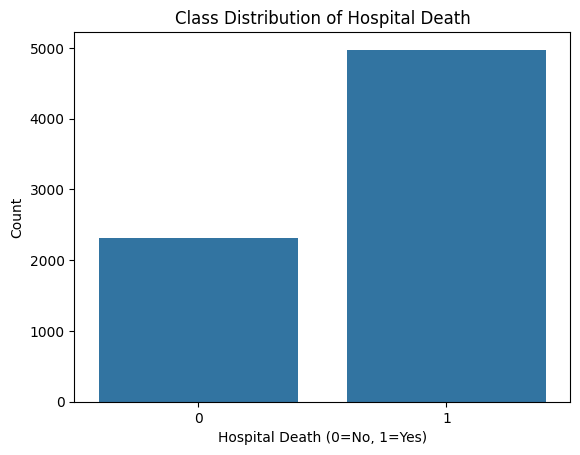

In [5]:
sns.countplot(x=df['death'])
plt.title("Class Distribution of Hospital Death")
plt.xlabel("Hospital Death (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


#### 1.3. Check Data Types

In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
for col in categorical_cols: print(col, end=", ")

Categorical Columns:
sex, dzgroup, dzclass, income, race, ca, dnr, 

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns: ")

for col in numerical_cols: print(col, end=", ")


Numerical Columns: 
age, num.co, edu, scoma, charges, totcst, totmcst, avtisst, sps, aps, surv2m, surv6m, hday, diabetes, dementia, prg2m, prg6m, dnrday, meanbp, wblc, hrt, resp, temp, pafi, alb, bili, crea, sod, ph, glucose, bun, urine, adlp, adls, adlsc, death, Id, 

#### 1.4. Checking Missing values in Dataset

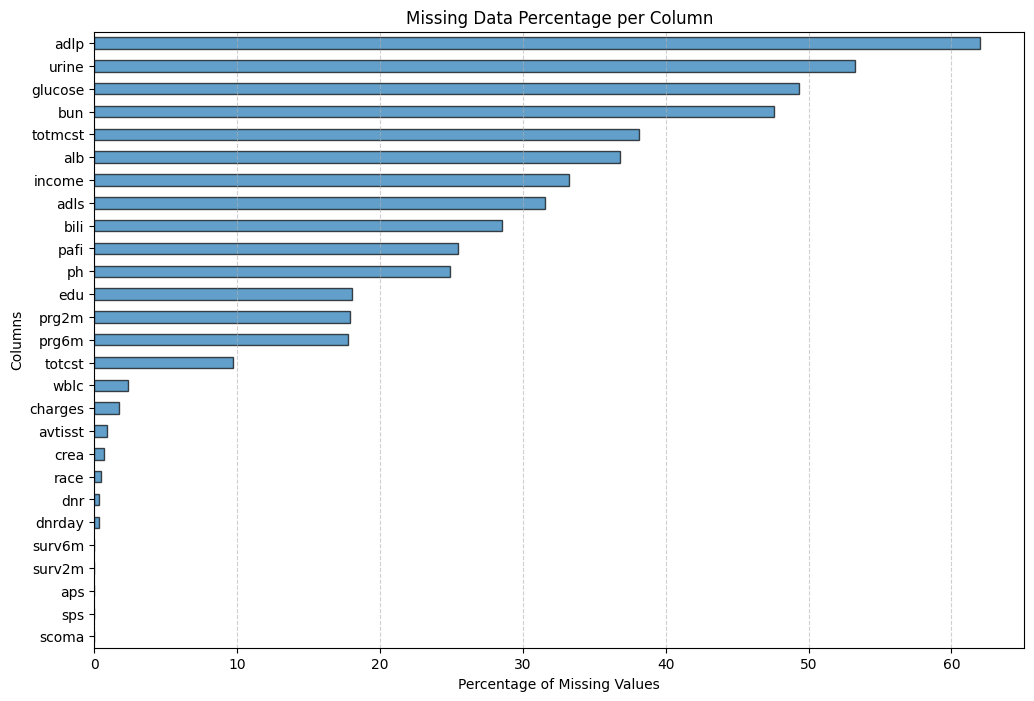

In [8]:

missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_columns = missing_percentage[missing_percentage > 0]
missing_columns.sort_values()

plt.figure(figsize=(12, 8))
missing_columns.sort_values().plot(kind='barh', edgecolor='black',alpha=0.7)
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Data Percentage per Column')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show plot
plt.show()

In [9]:
missing_columns.sort_values()

scoma       0.013729
sps         0.013729
aps         0.013729
surv2m      0.013729
surv6m      0.013729
dnrday      0.343218
dnr         0.343218
race        0.453048
crea        0.686436
avtisst     0.906096
charges     1.757276
wblc        2.388797
totcst      9.733663
prg6m      17.737507
prg2m      17.915980
edu        18.053267
ph         24.931356
pafi       25.466776
bili       28.528281
adls       31.521142
income     33.209775
alb        36.834157
totmcst    38.138386
bun        47.611203
glucose    49.327293
urine      53.226249
adlp       61.998902
dtype: float64

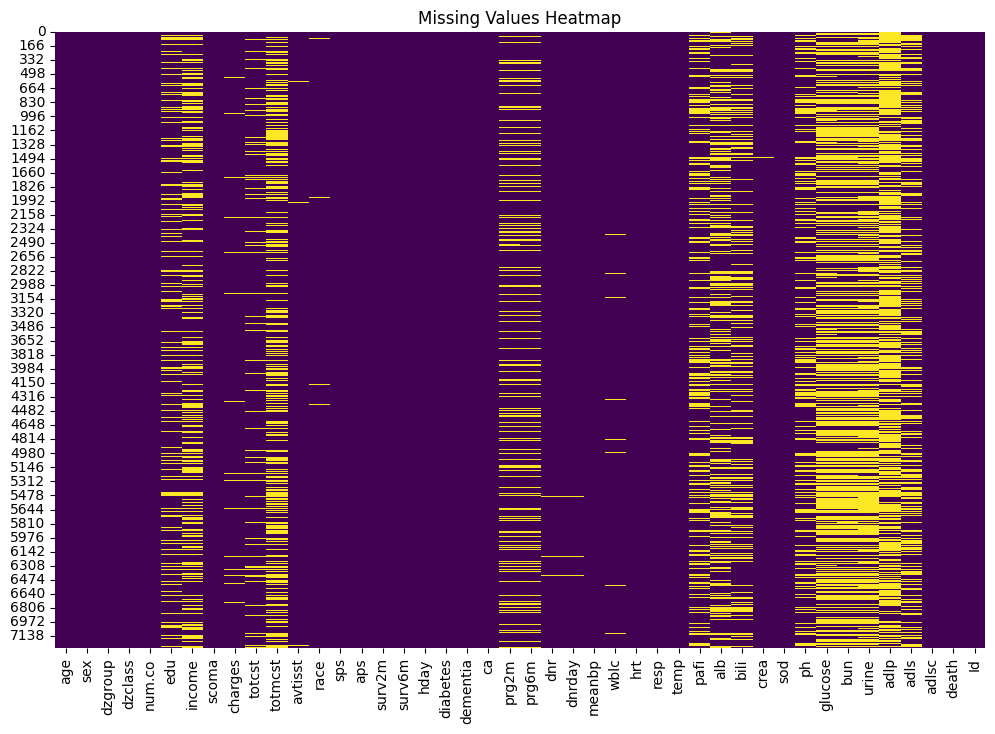

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

##### ***1.4.1 Merging `adlsc`, `adls`, and `adlp` features***
- Create a new column 'adl_final' based on priority:
- Use `adlsc` if available.
- If `adlsc` is missing, use `adlp`.
- If both are missing, use `adls`.

In [11]:
df['adl'] = df['adlsc'].fillna(df['adlp']).fillna(df['adls'])
df.drop(columns=['adlp', 'adls', 'adlsc'], inplace=True)
df['adl'].isnull().sum()

0

##### ***1.4.2. Drop Rows (A few Rows That Contain Missing Values In Specefied Columns)***
These features have very few missing values (<1%):

- `sps`     → 0.01%
- `aps`     → 0.01%
- `surv2m`  → 0.01%
- `surv6m`  → 0.01%
- `dnrday`  → 0.34%
- `dnr`     → 0.34%
- `race`    → 0.45%
- `crea`    → 0.68%



In [12]:
drop_columns = ['sps', 'aps', 'surv2m', 'surv6m', 'dnr', 'dnrday', 'race', 'crea']
df.dropna(subset=drop_columns,inplace=True)



##### ***1.4.3. Droping Cost Features Due To High Missing Values And They Are Not Informative***

- `totmcst`    →  ~38%
- `totcst`     →  ~10%
- `charges`    →  ~1.75%



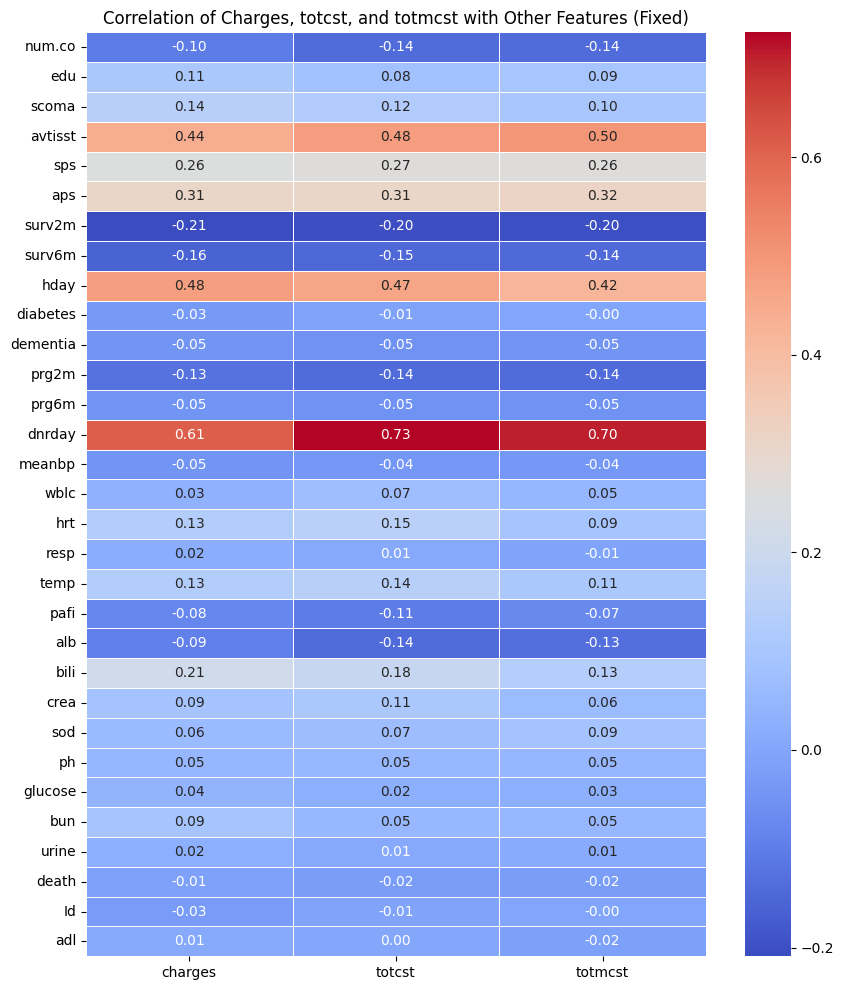

In [13]:
cost_features = ["charges", "totcst", "totmcst"]

excluded_features = ['ca', 'dnr', 'income', 'sex', 'age', 'race', 'dzgroup']

df_copy = df.copy()


# Drop non-numeric columns for correlation computation
df_numeric = df_copy.drop(columns=excluded_features, errors='ignore')

# Identify non-numeric columns in df_numeric
non_numeric_cols = df_numeric.select_dtypes(exclude=['number']).columns.tolist()

# Drop non-numeric columns
df_numeric_cleaned = df_numeric.drop(columns=non_numeric_cols, errors='ignore')

# Compute correlation with cost-related features
correlation_with_costs_fixed = df_numeric_cleaned.corr()[cost_features].drop(index=cost_features)

# Plot heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_with_costs_fixed, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Charges, totcst, and totmcst with Other Features (Fixed)")
plt.show()


In [14]:
from sklearn.feature_selection import mutual_info_classif


# Prepare the DataFrame with the relevant columns
df_analysis = df[['totmcst', 'totcst', 'charges', 'income', 'death']].copy()

# Map income to ordinal numeric values.
income_mapping = {"under $11k": 1, "$11-$25k": 2, "$25-$50k": 3, ">$50k": 4}
df_analysis['income_encoded'] = df_analysis['income'].map(income_mapping)

# Drop the original income column and rows with missing values in these columns.
df_analysis = df_analysis.drop(columns=['income']).dropna()

# Compute the Pearson correlation matrix including death
corr_matrix_death = df_analysis.corr()
print("Pearson Correlation Matrix with death:")
print(corr_matrix_death[['death']])

# Define the features for MI calculation and target for classification
features_mi = ['totmcst', 'totcst', 'charges', 'income_encoded']
X = df_analysis[features_mi]
y = df_analysis['death']

# Compute mutual information (MI) scores for classification
mi_scores_death = mutual_info_classif(X, y, random_state=0)
mi_dict_death = dict(zip(features_mi, mi_scores_death))
print("\nMutual Information Scores (with death as target):")
print(mi_dict_death)

Pearson Correlation Matrix with death:
                   death
totmcst         0.004749
totcst          0.003623
charges         0.013045
death           1.000000
income_encoded -0.009575

Mutual Information Scores (with death as target):
{'totmcst': 0.0063573803885819125, 'totcst': 0.0, 'charges': 0.0, 'income_encoded': 0.0}


In [15]:
df.drop(columns=["charges", "totcst", "totmcst", "income"], inplace=True)

##### ***1.4.4. Imputing Missing Values for `edu`, `avtisst`, `wblc` with median Imputation***

- **Imputation Strategy:**  
    - Missing values are replaced with the **median** to avoid the impact of outliers.
    - Median is preferred over the mean due to potential skewness in these distributions.

- **Why This Approach?**
  - **Mode Imputation** ensures categorical consistency.
  - **Median Imputation** is robust against extreme values.
  - Helps maintain dataset completeness without introducing bias.


In [16]:
median_edu = df['edu'].median() 
df.loc[:, 'edu'] = df['edu'].fillna(median_edu)

In [17]:
median_edu = df['avtisst'].median() 
df.loc[:, 'avtisst'] = df['avtisst'].fillna(median_edu)

In [18]:
median_edu = df['wblc'].median()  
df.loc[:, 'wblc'] = df['wblc'].fillna(median_edu)

##### ***1.4.5. Little’s MCAR Test and Predictive Imputation Process for missing data in `prg2m` and `prg6m`***  

- **Objective:**  
  - Evaluate whether missing data in `prg2m` and `prg6m` are Missing Completely At Random (MCAR) using Little’s MCAR test.
  - Perform predictive imputation for missing values based on correlated features.

- **MCAR Test Details:**  
  - **Columns Tested:**  
    - `prg2m` → Physician’s 2-month survival estimate  
    - `prg6m` → Physician’s 6-month survival estimate  
  - **Statistical Method:**  
    - Little’s MCAR test using chi-square calculation across missingness patterns.  
  - **Outputs:**  
    - Chi-square statistic  
    - Degrees of freedom (DOF)  
    - p-value indicating whether missingness is random  

- **Correlation Analysis:**  
  - Performed Pearson correlation between `prg2m`, `prg6m` and other numeric columns to understand predictive relationships.  

- **Predictor Features Used for Imputation:**  
  - surv2m → Machine-predicted 2-month survival estimate  
  - surv6m → Machine-predicted 6-month survival estimate  
  - scoma → Coma score  
  - sps → SUPPORT physiology score  
  - aps → APACHE III physiology score  
  - avtisst → Average TISS score  
  - age → Patient’s age  

- **Imputation Strategy:**  
  1. **Conduct Little’s MCAR test** on `prg2m` and `prg6m` columns to confirm randomness of missing data.  
  2. **Convert predictor features to numeric** to ensure consistent model input.  
  3. **Train a Linear Regression model for `prg6m`** using all available non-missing data and selected predictors.  
  4. **Predict missing `prg6m` values** and fill the dataset.  
  5. **Repeat the regression and prediction process for `prg2m`.**  
  6. **Replace missing values** with model predictions to complete imputation.

In [19]:
def little_mcar_test(data):
    """
    Perform Little's MCAR test on a DataFrame.
    
    Parameters:
        data (pd.DataFrame): DataFrame containing the variables to test.
        
    Returns:
        chi_stat (float): Chi-square statistic.
        dof (int): Degrees of freedom.
        p_value (float): p-value from the chi-square distribution.
    """
    # Work on a copy to avoid modifying the original DataFrame
    data = data.copy()
    
    # Calculate overall mean for each variable using complete cases only
    complete_cases = data.dropna()
    overall_mean = complete_cases.mean()
    
    # Find unique missingness patterns (binary indicator for missingness)
    missing_indicator = data.isnull().astype(int)
    unique_patterns = missing_indicator.drop_duplicates()
    
    chi_stat = 0.0
    total_observed = 0  # Total count of observed entries (over all patterns)
    
    # Iterate over each unique missingness pattern
    for idx, pattern in unique_patterns.iterrows():
        # Create mask for rows with this exact missingness pattern
        mask = (missing_indicator == pattern).all(axis=1)
        group = data[mask]
        n_r = len(group)
        if n_r == 0:
            continue
        
        # Identify columns that are observed (i.e., not missing) in this pattern
        obs_cols = pattern[pattern == 0].index.tolist()
        if len(obs_cols) == 0:
            continue  # Skip if no observed values
        
        # Compute the mean for the group (only for observed columns)
        group_mean = group[obs_cols].mean()
        overall_mean_r = overall_mean[obs_cols]
        
        # Compute the covariance matrix for the observed columns in this group
        S_r = group[obs_cols].cov()
        # Use pseudo-inverse if covariance matrix is singular
        try:
            inv_S_r = np.linalg.inv(S_r)
        except np.linalg.LinAlgError:
            inv_S_r = np.linalg.pinv(S_r)
        
        # Calculate the difference between group mean and overall mean (for observed columns)
        diff = group_mean - overall_mean_r
        
        # Accumulate chi-square statistic contribution for this pattern
        chi_stat += n_r * np.dot(np.dot(diff.T, inv_S_r), diff)
        
        # Add number of observed columns for degrees of freedom calculation
        total_observed += len(obs_cols)
    
    # Total number of variables in the dataset
    p = data.shape[1]
    # Degrees of freedom: total observed entries (across patterns) minus number of variables
    dof = total_observed - p
    # p-value from the chi-square distribution
    p_value = 1 - chi2.cdf(chi_stat, dof)
    
    return chi_stat, dof, p_value



In [20]:
# Test the missingness for the 'prg2m' and 'prg6m' columns:
data_for_test = df[['prg2m', 'prg6m']]
chi_stat, dof, p_value = little_mcar_test(data_for_test)
print("Little's MCAR Test:")
print("Chi-square Statistic:", chi_stat)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)


Little's MCAR Test:
Chi-square Statistic: 0.00011176931311945889
Degrees of Freedom: 1
p-value: 0.9915648412119455


In [21]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()# Compute correlations for prg2m'ArithmeticError



In [22]:
if 'prg2m' not in numeric_cols: numeric_cols.append('prg2m')
    
# Compute correlations for prg2m using only numeric columns
correlations_prg2m = df[numeric_cols].corr()['prg2m'].drop('prg2m')
print("Correlations with prg2m:")
print(correlations_prg2m)


Correlations with prg2m:
age        -0.084215
num.co      0.059596
edu         0.016989
scoma      -0.412590
avtisst    -0.400276
sps        -0.421944
aps        -0.409561
surv2m      0.578509
surv6m      0.542428
hday       -0.172661
diabetes    0.010579
dementia   -0.036528
prg6m       0.895959
dnrday      0.045865
meanbp      0.065042
wblc       -0.061905
hrt        -0.084903
resp       -0.030563
temp       -0.078489
pafi        0.091608
alb         0.129466
bili       -0.123468
crea       -0.076406
sod        -0.033966
ph          0.020379
glucose    -0.000943
bun        -0.030662
urine       0.012281
death      -0.308020
Id          0.000135
adl        -0.162100
Name: prg2m, dtype: float64


In [23]:
if 'prg6m' not in numeric_cols: numeric_cols.append('prg6m')


correlations_prg6m = df[numeric_cols].corr()['prg6m'].drop('prg6m')
print("\nCorrelations with prg6m:")
print(correlations_prg6m)


Correlations with prg6m:
age        -0.134872
num.co      0.021671
edu         0.004216
scoma      -0.324238
avtisst    -0.255892
sps        -0.320631
aps        -0.292885
surv2m      0.523923
surv6m      0.538281
hday       -0.124155
diabetes    0.016061
dementia   -0.049263
prg2m       0.895959
dnrday      0.112324
meanbp      0.057980
wblc       -0.030718
hrt        -0.047614
resp       -0.021561
temp       -0.041715
pafi        0.055797
alb         0.074533
bili       -0.101787
crea       -0.050752
sod        -0.015247
ph          0.014800
glucose    -0.003376
bun        -0.021585
urine       0.004305
death      -0.383005
Id         -0.012954
adl        -0.168262
Name: prg6m, dtype: float64


In [24]:
regression_features = ['surv2m', 'surv6m', 'scoma', 'sps', 'aps', 'avtisst', 'age']
target_variables = ['prg6m', 'prg2m']

# Ensure relevant features are numeric
df[regression_features] = df[regression_features].apply(pd.to_numeric, errors='coerce')

# Impute missing prg6m values
known_prg6m = df[df['prg6m'].notna()]
missing_prg6m = df[df['prg6m'].isna()]

# Train regression model on entire known dataset
regressor_prg6m = LinearRegression()
regressor_prg6m.fit(known_prg6m[regression_features], known_prg6m['prg6m'])

# Predict and fill missing prg6m values
df.loc[df['prg6m'].isna(), 'prg6m'] = regressor_prg6m.predict(missing_prg6m[regression_features])

# Repeat for prg2m
known_prg2m = df[df['prg2m'].notna()]
missing_prg2m = df[df['prg2m'].isna()]

# Train regression model on entire known dataset
regressor_prg2m = LinearRegression()
regressor_prg2m.fit(known_prg2m[regression_features], known_prg2m['prg2m'])

# Predict and fill missing prg2m values
df.loc[df['prg2m'].isna(), 'prg2m'] = regressor_prg2m.predict(missing_prg2m[regression_features])


##### ***1.4.6. Imputing Missing Values Using KNN Imputer***

- **Features Imputed**:  
  - `ph`  
  - `pafi` (log-transformed)  
  - `bili` (log-transformed)  
  - `alb`  

- **Preprocessing Steps:**
  - `pafi` and `bili` are **log-transformed** to handle skewness.
  - Missing values in the selected features are **imputed using KNNImputer** with `n_neighbors=40`.
  - The imputed values for `pafi_log` and `bili_log` are **exponentiated back** to their original scale.
  - Temporary log-transformed columns (`pafi_log`, `bili_log`) are **dropped** after imputation.

- **Why KNN Imputation?**  
  - It leverages similar patients’ data for filling missing values.
  - It maintains feature relationships rather than using mean/median imputation.
  - A high `n_neighbors=40` ensures smoother estimates and reduces noise.


In [25]:
impute_cols = ['ph', 'pafi_log', 'bili_log', 'alb']

df['pafi_log'] = np.log(df['pafi'] + 1)
df['bili_log'] = np.log(df['bili'] + 1)


imputer = KNNImputer(n_neighbors=40)
df[impute_cols] = imputer.fit_transform(df[impute_cols])


df['pafi'] = np.exp(df['pafi_log']) - 1
df['bili'] = np.exp(df['bili_log']) - 1


df.drop(['pafi_log', 'bili_log'], axis=1, inplace=True)



Number of negative values in 'bili': 0
Number of negative values in 'pafi': 0


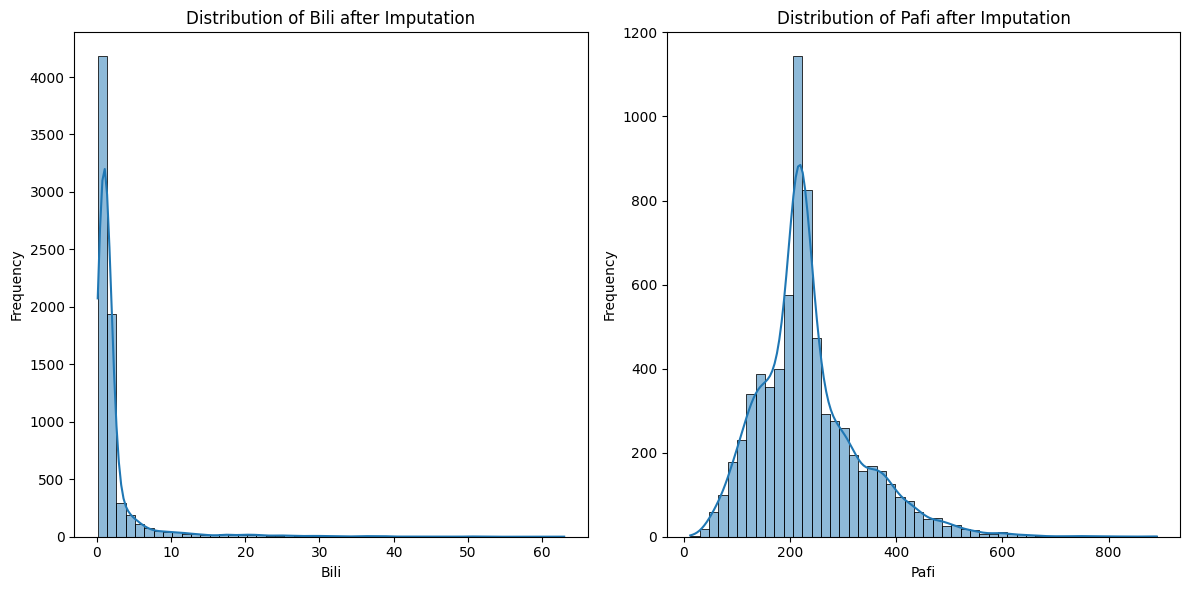

In [26]:
# Check for negative values in 'bili' and 'pafi'
negative_bili = df[df['bili'] < 0]
negative_pafi = df[df['pafi'] < 0]


print(f"Number of negative values in 'bili': {len(negative_bili)}")
print(f"Number of negative values in 'pafi': {len(negative_pafi)}")

# Plot distributions of 'bili' and 'pafi' after imputation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['bili'], bins=50, kde=True)
plt.title('Distribution of Bili after Imputation')
plt.xlabel('Bili')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['pafi'], bins=50, kde=True)
plt.title('Distribution of Pafi after Imputation')
plt.xlabel('Pafi')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
if 'bun' not in numeric_cols: numeric_cols.append('bun')


# Compute the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Extract the correlation of glucose with the other columns
bun_correlation = correlation_matrix['bun'].drop('bun')
print("Correlation of bun with diabetes:")
print(bun_correlation)

Correlation of bun with diabetes:
age         0.022244
num.co      0.027880
edu         0.042761
scoma       0.021974
avtisst     0.028335
sps         0.059728
aps         0.078626
surv2m     -0.066830
surv6m     -0.060546
hday        0.059466
diabetes    0.026885
dementia   -0.018039
prg2m      -0.038351
prg6m      -0.025735
dnrday      0.013333
meanbp     -0.135924
wblc        0.143922
hrt         0.027138
resp        0.004512
temp       -0.030954
pafi       -0.011101
alb        -0.120119
bili        0.225854
crea        0.682071
sod         0.100612
ph         -0.110232
glucose     0.147718
urine      -0.248743
death       0.023172
Id          0.024873
adl         0.009767
Name: bun, dtype: float64


In [28]:
if 'urine' not in numeric_cols: numeric_cols.append('urine')


# Compute the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Extract the correlation of glucose with the other columns
urine_correlation = correlation_matrix['urine'].drop('urine')
print("Correlation of bun with diabetes:")
print(urine_correlation)

Correlation of bun with diabetes:
age        -0.028980
num.co     -0.038700
edu         0.013484
scoma      -0.000742
avtisst    -0.001234
sps        -0.015572
aps        -0.034598
surv2m      0.011847
surv6m      0.010188
hday        0.004863
diabetes   -0.033582
dementia   -0.039861
prg2m       0.012345
prg6m       0.005173
dnrday      0.004489
meanbp      0.159668
wblc       -0.088833
hrt         0.029585
resp        0.019308
temp        0.112613
pafi       -0.026132
alb         0.037193
bili       -0.077112
crea       -0.301846
sod         0.035234
ph          0.114192
glucose     0.009815
bun        -0.248743
death      -0.012828
Id          0.010626
adl        -0.030212
Name: urine, dtype: float64


In [29]:
impute_features_bun_urine = ['bun', 'crea', 'bili', 'urine']

# Initialize one KNNImputer for both features
knn_imputer = KNNImputer(n_neighbors=5)

# Perform imputation in one go
df[impute_features_bun_urine] = knn_imputer.fit_transform(df[impute_features_bun_urine])

# Check if any missing values remain
missing_after = df[impute_features_bun_urine].isnull().sum()
print("Missing values after combined KNN imputation:")
print(missing_after)


Missing values after combined KNN imputation:
bun      0
crea     0
bili     0
urine    0
dtype: int64


In [30]:

missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_columns = missing_percentage[missing_percentage > 0]
missing_columns.sort_values()

glucose    48.996656
dtype: float64

In [31]:
if 'glucose' not in numeric_cols: numeric_cols.append('glucose')


# Compute the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Extract the correlation of glucose with the other columns
bun_correlation = correlation_matrix['glucose'].drop('glucose')
print("Correlation of glucose with diabetes:")
print(bun_correlation)

Correlation of glucose with diabetes:
age        -0.006833
num.co      0.015382
edu         0.004258
scoma       0.032113
avtisst     0.017257
sps         0.011715
aps         0.024395
surv2m     -0.025312
surv6m     -0.024230
hday        0.015376
diabetes    0.013834
dementia    0.013896
prg2m      -0.005313
prg6m      -0.006338
dnrday      0.002686
meanbp      0.021545
wblc        0.075671
hrt         0.064625
resp        0.023898
temp        0.047552
pafi       -0.019048
alb        -0.043304
bili        0.015983
crea        0.061102
sod         0.022625
ph         -0.022451
bun         0.148027
urine       0.007328
death       0.003445
Id         -0.011831
adl         0.001693
Name: glucose, dtype: float64


In [32]:
median_edu = df['glucose'].median() 
df.loc[:, 'glucose'] = df['glucose'].fillna(median_edu)

##### ***1.4.7. Making New Features***

- **Features:**  
  - `bun_crea_ratio`: High BUN/creatinine ratio indicates specific kidney stress.  
  - `pafi_per_resp`: Oxygenation efficiency per respiration rate.  
  - `crea_wblc_interaction`: Kidney dysfunction and inflammation interplay.  
  - `low_ph_flag`: Identifies severe acidosis cases.  
  - `high_bili_flag`: Flags cases with extreme bilirubin levels.  
  - `high_comorb_flag`: Identifies patients with multiple comorbidities.  
  - `high_crea_flag`: Flags high creatinine levels as a sign of kidney failure.  
  - `low_pafi_flag`: Detects critical hypoxemia cases.  
  - `lab_stress_score`: Aggregates multiple lab results to measure overall physiological stress.  
  - `comorbidity_risk`: Scores patients based on comorbid conditions and cancer status.  

- **Preprocessing Steps:**  
  - Missing values in selected features are **imputed using median imputation** or clinically neutral values.  
  - `lab_stress_score` is computed as a composite metric incorporating albumin, bilirubin, creatinine, BUN, glucose, PAFI, and pH.  
  - Cancer risk is quantified using a scoring function where **metastatic = 2, cancer = 1, no cancer = 0**.  
  - Temporary columns used for imputation are **dropped** after feature engineering.  

- **Why These Features?**  
  - Combines domain knowledge with statistical techniques to improve predictive power.  
  - Captures **nonlinear interactions** that may be missed by raw features.  
  - Aims to improve model robustness by reducing noise and emphasizing critical patient conditions.  



In [33]:
df['alb_filled'] = df['alb'].fillna(df['alb'].median())
df['bili_filled'] = df['bili'].fillna(df['bili'].median())
df['crea_filled'] = df['crea'].fillna(df['crea'].median())
df['bun_filled'] = df['bun'].fillna(df['bun'].median())
df['glucose_filled'] = df['glucose'].fillna(df['glucose'].median())
df['pafi_filled'] = df['pafi'].fillna(df['pafi'].median())
df['ph_filled'] = df['ph'].fillna(7.4)  # clinically neutral pH

# Create lab_stress_score
df['lab_stress_score'] = (
    (1 / df['alb_filled']) +
    df['bili_filled'] +
    df['crea_filled'] +
    df['bun_filled'] +
    df['glucose_filled'] +
    (1 / df['pafi_filled']) +
    abs(df['ph_filled'] - 7.4)
)


In [34]:

# Create comorbidity risk feature
def cancer_score(ca):
    if ca == 'metastatic':
        return 2
    elif ca == 'yes':
        return 1
    else:
        return 0

df['cancer_risk'] = df['ca'].apply(cancer_score)
df['comorbidity_risk'] = (
    df['num.co'] + 
    df['diabetes'] + 
    df['dementia'] + 
    df['cancer_risk']
)

# Clean up intermediate columns
df.drop(columns=['alb_filled', 'bili_filled', 'crea_filled', 'bun_filled', 'glucose_filled', 'pafi_filled', 'ph_filled', 'cancer_risk'], inplace=True)




In [35]:
# Ratios and interactions
df['bun_crea_ratio'] = df['bun'] / (df['crea'] + 0.01)
df['pafi_per_resp'] = df['pafi'] / (df['resp'] + 0.01)
df['crea_wblc_interaction'] = df['crea'] * df['wblc']

# Binary flags for critical conditions
df['low_ph_flag'] = (df['ph'] < 7.3).astype(int)
df['high_bili_flag'] = (df['bili'] > 10).astype(int)
df['high_comorb_flag'] = (df['num.co'] > 3).astype(int)
df['high_crea_flag'] = (df['crea'] > 3).astype(int)
df['low_pafi_flag'] = (df['pafi'] < 200).astype(int)

# Fill values for stable score generation
df['alb_filled'] = df['alb'].fillna(df['alb'].median())
df['bili_filled'] = df['bili'].fillna(df['bili'].median())
df['crea_filled'] = df['crea'].fillna(df['crea'].median())
df['bun_filled'] = df['bun'].fillna(df['bun'].median())
df['glucose_filled'] = df['glucose'].fillna(df['glucose'].median())
df['pafi_filled'] = df['pafi'].fillna(df['pafi'].median())
df['ph_filled'] = df['ph'].fillna(7.4)

---
---
---
---

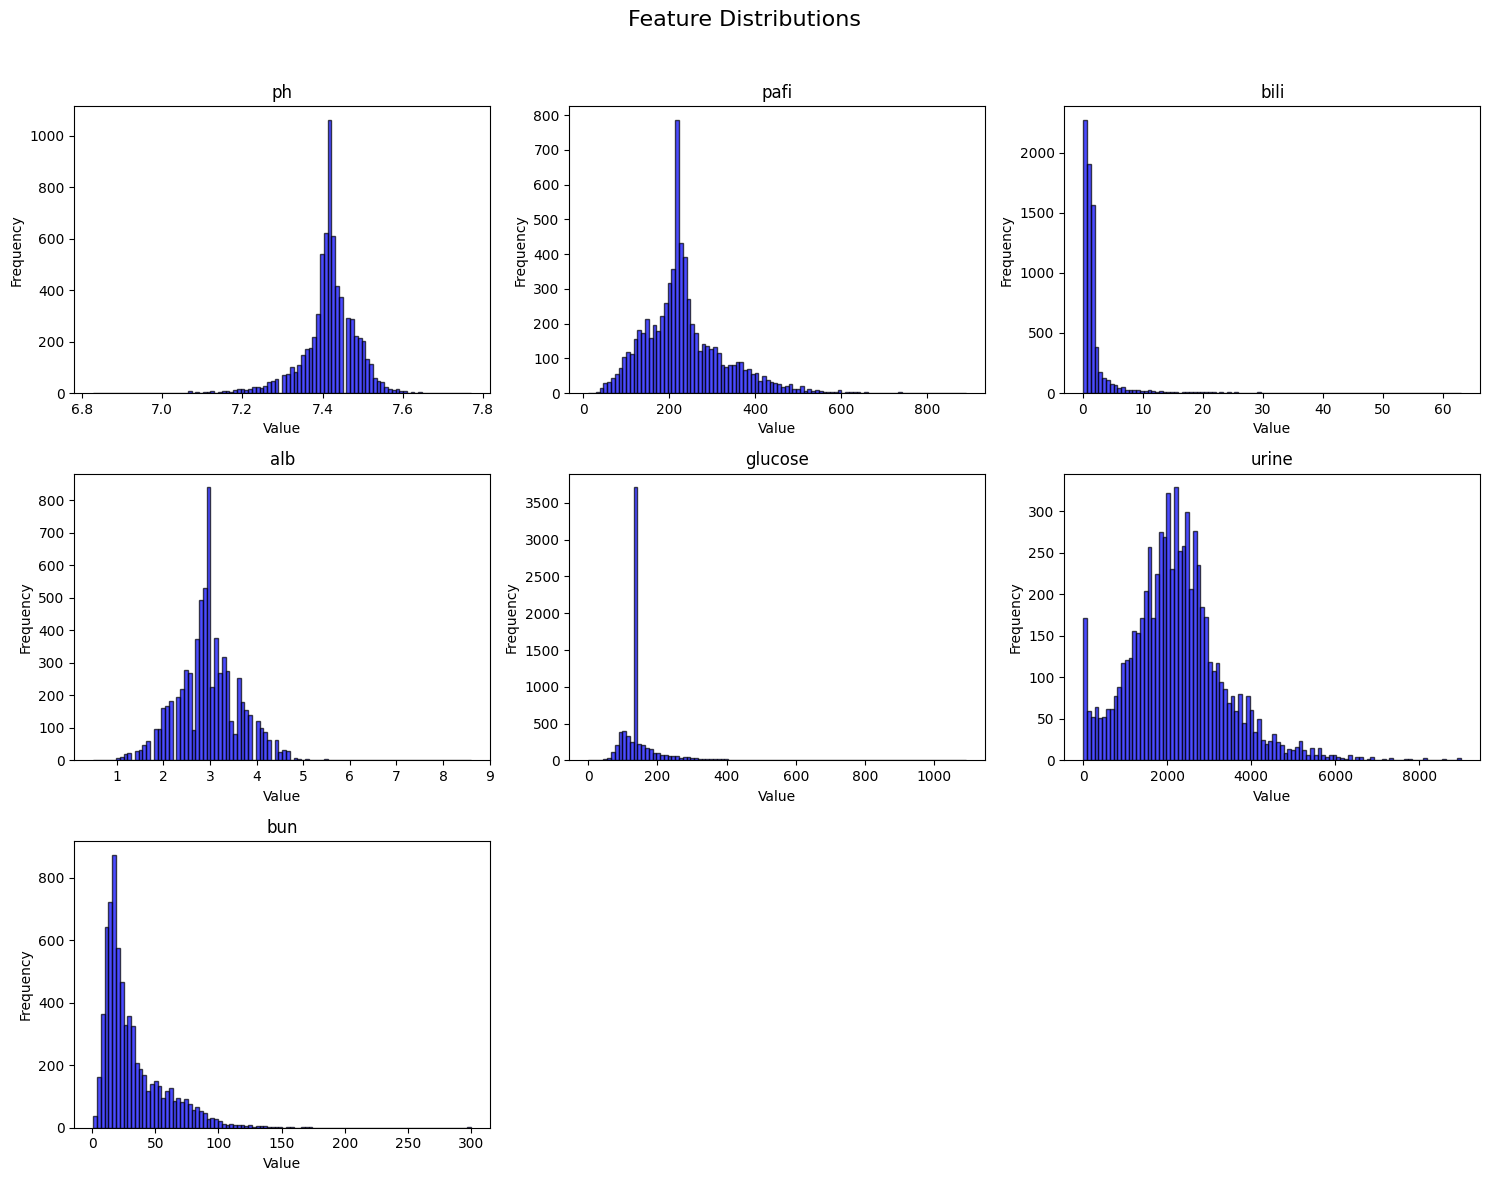

In [36]:

features = ['ph', 'pafi', 'bili', 'alb','glucose', 'urine', 'bun' ]

# Define number of rows and columns for subplots (4x4 grid)
rows, cols = 3, 3

# Create a figure for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
fig.suptitle("Feature Distributions", fontsize=16)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    if feature in df.columns:
        axes[i].hist(df[feature].dropna(), bins=100, alpha=0.7, color='blue', edgecolor='black')
        axes[i].set_title(feature)
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


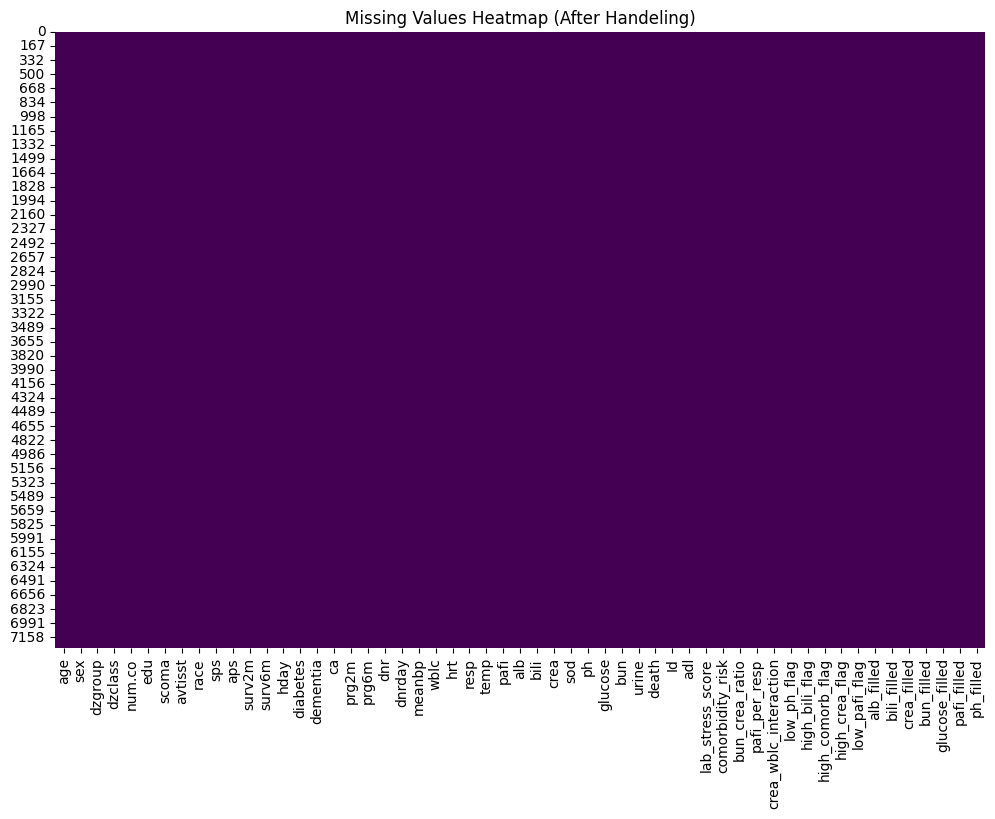

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (After Handeling)")
plt.show()

---
---
---
---

#### 1.5. Check for Duplicate Rows

In [38]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


#### 1.6. Check for Constant Columns

In [39]:
constant_columns = df.nunique()[df.nunique() == 1]
print("Constant columns:", constant_columns)


Constant columns: Series([], dtype: int64)


#### 1.7. Categorical Feature Cardinality Check

In [40]:
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")


sex: 2 unique values
dzgroup: 8 unique values
dzclass: 4 unique values
race: 5 unique values
ca: 3 unique values
dnr: 3 unique values


In [41]:
df.isnull().sum()

age                      0
sex                      0
dzgroup                  0
dzclass                  0
num.co                   0
edu                      0
scoma                    0
avtisst                  0
race                     0
sps                      0
aps                      0
surv2m                   0
surv6m                   0
hday                     0
diabetes                 0
dementia                 0
ca                       0
prg2m                    0
prg6m                    0
dnr                      0
dnrday                   0
meanbp                   0
wblc                     0
hrt                      0
resp                     0
temp                     0
pafi                     0
alb                      0
bili                     0
crea                     0
sod                      0
ph                       0
glucose                  0
bun                      0
urine                    0
death                    0
Id                       0
a

---
---
---

## 2. Preprocessing and Feature Extraction

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


##### 2.1. Encoding Categorical Variables
- One-Hot Encoding for categorical variables with multiple categories
- Convert Binary Feature (`sex`) 'male'/'female' to 1/0 for binary features

In [43]:
df_cleaned = pd.get_dummies(df, columns=['dzgroup', 'dzclass', 'race', 'ca', 'dnr'], drop_first=True)


In [44]:
# Convert 'male'/'female' to 1/0
df_cleaned['sex'] = df_cleaned['sex'].map({'male': 1, 'female': 0})


In [45]:
print(df_cleaned[['diabetes', 'dementia', 'sex']].isnull().sum())


diabetes    0
dementia    0
sex         0
dtype: int64


##### 2.2. Feature Scaling (Normalization)
Since neural networks are sensitive to different scales, we should normalize numerical features.

In [46]:
scaler = MinMaxScaler()
num_features = ['age', 'num.co', 'edu', 'sps', 'aps', 'surv2m', 'surv6m', 'prg2m', 'prg6m',
                'ph', 'alb', 'bili', 'glucose', 'bun', 'crea', 'pafi', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'urine', 'avtisst', 'adl']

df_cleaned[num_features] = scaler.fit_transform(df_cleaned[num_features])

In [47]:
df.shape

(7176, 55)

#### 2.3. Feature Selection
- Correlation Analysis: Remove features highly correlated with others.
- Feature Importance from Random Forest model.


In [48]:
# # Compute correlation matrix
# correlation_matrix = df_cleaned.corr()

# # Filter correlations related to the target variable ('death')
# correlation_with_target = correlation_matrix['death'].abs().sort_values(ascending=False)

# # Plot heatmap of the correlation matrix (top features only)
# plt.figure(figsize=(20, 14))
# sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
# plt.title("Feature Correlation Heatmap")
# plt.show()




In [49]:
# # Drop the 2-month versions of the predictions
# df_cleaned.drop(columns=['surv2m', 'prg2m', 'glucose'], inplace=True)

In [50]:
# # Drop columns that start with 'dzclass_'
# dzclass_cols = [col for col in df_cleaned.columns if col.startswith('dzclass_')]
# df_cleaned.drop(columns=dzclass_cols, inplace=True)


#### 2.4. Splitting Dataset

In [51]:
X = df_cleaned.drop(columns=['death', 'Id'])      # Features
y = df_cleaned['death']                           # Target variable

In [52]:
from sklearn.model_selection import train_test_split
import shap

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


c:\Users\taha_kms\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---
---
---

# 3. Model Development

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU
import tensorflow_addons as tfa
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.activations import swish
from tensorflow.keras.layers import Conv1D, Flatten
from tensorflow.keras import layers, models, callbacks
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

c:\Users\taha_kms\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


#### 3.1. Since this is a binary classification problem (death: 0 or 1), we will use a Feedforward Neural Network (FNN) with:

- Input layer: Number of features in the dataset.
- Hidden layers: 2-3 layers with ReLU activation.
- Dropout layers: To reduce overfitting.
- Output layer: 1 neuron with Sigmoid activation (to predict probability of death).

In [54]:
X_train_resampled = tf.convert_to_tensor(X_train, dtype=tf.float32)
Y_train_resampled = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(class_weight_dict)

{0: 1.5747599451303156, 1: 0.7326100829610721}


In [55]:

model = models.Sequential([
    layers.Input(shape=(X_train_resampled.shape[1],)),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),

    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
                loss='binary_crossentropy',
                metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

In [ ]:
import shap

# Convert tensors to numpy arrays if needed
X_val_np = X_val.numpy() if not isinstance(X_val, np.ndarray) else X_val
y_val_np = y_val.numpy() if not isinstance(y_val, np.ndarray) else y_val

# Convert to DataFrame for feature names
X_val_df = pd.DataFrame(X_val_np, columns=X.columns)

# Use a smaller background summary (K=50)
background = shap.kmeans(X_val_df, 50)

# Select a small sample to explain
X_val_sample = X_val_df.iloc[:300]  # small sample for faster compute

# Create explainer using the background summary
explainer = shap.KernelExplainer(model.predict, background)

# Calculate SHAP values
shap_values = explainer.shap_values(X_val_sample, nsamples=100)




16/16 [==============================] - 0s 1ms/step


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/500 [00:00<?, ?it/s]

1563/1563 [==============================] - 2s 1ms/step


  0%|          | 1/500 [00:02<17:40,  2.12s/it]

1563/1563 [==============================] - 2s 1ms/step


  0%|          | 2/500 [00:04<19:18,  2.33s/it]

1563/1563 [==============================] - 2s 1ms/step


  1%|          | 3/500 [00:06<19:31,  2.36s/it]

1563/1563 [==============================] - 2s 1ms/step


  1%|          | 4/500 [00:09<19:45,  2.39s/it]

1563/1563 [==============================] - 2s 1ms/step


  1%|          | 5/500 [00:11<19:08,  2.32s/it]

1563/1563 [==============================] - 2s 1ms/step


  1%|          | 6/500 [00:13<18:42,  2.27s/it]

1563/1563 [==============================] - 2s 1ms/step


  1%|▏         | 7/500 [00:15<18:07,  2.21s/it]

1563/1563 [==============================] - 2s 1ms/step


  2%|▏         | 8/500 [00:18<18:09,  2.21s/it]

1563/1563 [==============================] - 2s 1ms/step


  2%|▏         | 9/500 [00:20<17:59,  2.20s/it]

1563/1563 [==============================] - 2s 1ms/step


  2%|▏         | 10/500 [00:22<18:15,  2.24s/it]

1563/1563 [==============================] - 2s 1ms/step


  2%|▏         | 11/500 [00:24<18:13,  2.24s/it]

1563/1563 [==============================] - 2s 1ms/step


  2%|▏         | 12/500 [00:27<18:03,  2.22s/it]

1563/1563 [==============================] - 2s 1ms/step


  3%|▎         | 13/500 [00:29<17:54,  2.21s/it]

1563/1563 [==============================] - 2s 1ms/step


  3%|▎         | 14/500 [00:31<17:46,  2.19s/it]

1563/1563 [==============================] - 2s 985us/step


  3%|▎         | 15/500 [00:33<17:20,  2.15s/it]

1563/1563 [==============================] - 2s 1ms/step


  3%|▎         | 16/500 [00:35<17:10,  2.13s/it]

1563/1563 [==============================] - 2s 1ms/step


  3%|▎         | 17/500 [00:37<16:59,  2.11s/it]

1563/1563 [==============================] - 2s 1ms/step


  4%|▎         | 18/500 [00:39<16:50,  2.10s/it]

1563/1563 [==============================] - 2s 954us/step


  4%|▍         | 19/500 [00:41<16:21,  2.04s/it]

1563/1563 [==============================] - 1s 928us/step


  4%|▍         | 20/500 [00:43<15:53,  1.99s/it]

1563/1563 [==============================] - 2s 964us/step


  4%|▍         | 21/500 [00:45<15:56,  2.00s/it]

1563/1563 [==============================] - 2s 1ms/step


  4%|▍         | 22/500 [00:47<16:56,  2.13s/it]

1563/1563 [==============================] - 2s 1ms/step


  5%|▍         | 23/500 [00:50<17:09,  2.16s/it]

1563/1563 [==============================] - 2s 1ms/step


  5%|▍         | 24/500 [00:52<16:57,  2.14s/it]

1563/1563 [==============================] - 2s 1ms/step


  5%|▌         | 25/500 [00:54<17:13,  2.18s/it]

1563/1563 [==============================] - 2s 1ms/step


  5%|▌         | 26/500 [00:56<17:20,  2.20s/it]

1563/1563 [==============================] - 2s 1ms/step


  5%|▌         | 27/500 [00:58<17:18,  2.20s/it]

1563/1563 [==============================] - 2s 1ms/step


  6%|▌         | 28/500 [01:01<17:28,  2.22s/it]

1563/1563 [==============================] - 2s 1ms/step


  6%|▌         | 29/500 [01:03<17:38,  2.25s/it]

1563/1563 [==============================] - 2s 1ms/step


  6%|▌         | 30/500 [01:05<18:05,  2.31s/it]

1563/1563 [==============================] - 2s 1ms/step


  6%|▌         | 31/500 [01:08<17:42,  2.27s/it]

1563/1563 [==============================] - 1s 932us/step


  6%|▋         | 32/500 [01:09<16:42,  2.14s/it]

1563/1563 [==============================] - 1s 918us/step


  7%|▋         | 33/500 [01:11<15:58,  2.05s/it]

1563/1563 [==============================] - 1s 931us/step


  7%|▋         | 34/500 [01:13<15:33,  2.00s/it]

1563/1563 [==============================] - 1s 923us/step


  7%|▋         | 35/500 [01:15<15:15,  1.97s/it]

1563/1563 [==============================] - 2s 992us/step


  7%|▋         | 36/500 [01:17<15:15,  1.97s/it]

1563/1563 [==============================] - 2s 1ms/step


  7%|▋         | 37/500 [01:19<15:35,  2.02s/it]

1563/1563 [==============================] - 1s 925us/step


  8%|▊         | 38/500 [01:21<15:17,  1.98s/it]

1563/1563 [==============================] - 2s 1ms/step


  8%|▊         | 39/500 [01:23<16:08,  2.10s/it]

1563/1563 [==============================] - 2s 982us/step


  8%|▊         | 40/500 [01:25<15:48,  2.06s/it]

1563/1563 [==============================] - 2s 1ms/step


  8%|▊         | 41/500 [01:27<15:37,  2.04s/it]

1563/1563 [==============================] - 1s 935us/step


  8%|▊         | 42/500 [01:29<15:21,  2.01s/it]

1563/1563 [==============================] - 1s 955us/step


  9%|▊         | 43/500 [01:31<15:12,  2.00s/it]

1563/1563 [==============================] - 2s 1ms/step


  9%|▉         | 44/500 [01:33<15:32,  2.05s/it]

1563/1563 [==============================] - 2s 1ms/step


  9%|▉         | 45/500 [01:36<16:19,  2.15s/it]

1563/1563 [==============================] - 2s 1ms/step


  9%|▉         | 46/500 [01:38<16:31,  2.18s/it]

1563/1563 [==============================] - 2s 1ms/step


  9%|▉         | 47/500 [01:40<16:07,  2.14s/it]

1563/1563 [==============================] - 2s 1ms/step


 10%|▉         | 48/500 [01:42<15:51,  2.10s/it]

1563/1563 [==============================] - 2s 999us/step


 10%|▉         | 49/500 [01:44<15:34,  2.07s/it]

1563/1563 [==============================] - 1s 945us/step


 10%|█         | 50/500 [01:46<15:09,  2.02s/it]

1563/1563 [==============================] - 1s 941us/step


 10%|█         | 51/500 [01:48<14:57,  2.00s/it]

1563/1563 [==============================] - 2s 974us/step


 10%|█         | 52/500 [01:50<14:46,  1.98s/it]

1563/1563 [==============================] - 1s 924us/step


 11%|█         | 53/500 [01:52<14:29,  1.95s/it]

1563/1563 [==============================] - 1s 868us/step


 11%|█         | 54/500 [01:54<14:07,  1.90s/it]

1563/1563 [==============================] - 2s 967us/step


 11%|█         | 55/500 [01:56<14:10,  1.91s/it]

1563/1563 [==============================] - 1s 914us/step


 11%|█         | 56/500 [01:57<14:00,  1.89s/it]

1563/1563 [==============================] - 1s 947us/step


 11%|█▏        | 57/500 [01:59<13:59,  1.90s/it]

1563/1563 [==============================] - 1s 922us/step


 12%|█▏        | 58/500 [02:01<13:54,  1.89s/it]

1563/1563 [==============================] - 1s 916us/step


 12%|█▏        | 59/500 [02:03<13:47,  1.88s/it]

1563/1563 [==============================] - 2s 960us/step


 12%|█▏        | 60/500 [02:05<13:52,  1.89s/it]

1563/1563 [==============================] - 1s 915us/step


 12%|█▏        | 61/500 [02:07<13:46,  1.88s/it]

1563/1563 [==============================] - 1s 940us/step


 12%|█▏        | 62/500 [02:09<13:45,  1.88s/it]

1563/1563 [==============================] - 2s 968us/step


 13%|█▎        | 63/500 [02:11<13:49,  1.90s/it]

1563/1563 [==============================] - 1s 942us/step


 13%|█▎        | 64/500 [02:13<13:46,  1.90s/it]

1563/1563 [==============================] - 2s 947us/step


 13%|█▎        | 65/500 [02:14<13:46,  1.90s/it]

1563/1563 [==============================] - 2s 967us/step


 13%|█▎        | 66/500 [02:16<13:51,  1.92s/it]

1563/1563 [==============================] - 2s 1ms/step


 13%|█▎        | 67/500 [02:18<14:07,  1.96s/it]

1563/1563 [==============================] - 2s 976us/step


 14%|█▎        | 68/500 [02:20<14:03,  1.95s/it]

1563/1563 [==============================] - 1s 901us/step


 14%|█▍        | 69/500 [02:22<13:43,  1.91s/it]

1563/1563 [==============================] - 1s 914us/step


 14%|█▍        | 70/500 [02:24<13:32,  1.89s/it]

1563/1563 [==============================] - 1s 903us/step


 14%|█▍        | 71/500 [02:26<13:22,  1.87s/it]

1563/1563 [==============================] - 1s 912us/step


 14%|█▍        | 72/500 [02:28<13:14,  1.86s/it]

1563/1563 [==============================] - 1s 902us/step


 15%|█▍        | 73/500 [02:30<13:08,  1.85s/it]

1563/1563 [==============================] - 1s 918us/step


 15%|█▍        | 74/500 [02:31<13:04,  1.84s/it]

1563/1563 [==============================] - 1s 894us/step


 15%|█▌        | 75/500 [02:33<13:00,  1.84s/it]

1563/1563 [==============================] - 1s 897us/step


 15%|█▌        | 76/500 [02:35<12:52,  1.82s/it]

1563/1563 [==============================] - 1s 872us/step


 15%|█▌        | 77/500 [02:37<12:43,  1.81s/it]

1563/1563 [==============================] - 1s 900us/step


 16%|█▌        | 78/500 [02:39<12:44,  1.81s/it]

1563/1563 [==============================] - 1s 893us/step


 16%|█▌        | 79/500 [02:40<12:43,  1.81s/it]

1563/1563 [==============================] - 1s 926us/step


 16%|█▌        | 80/500 [02:42<12:49,  1.83s/it]

1563/1563 [==============================] - 1s 879us/step


 16%|█▌        | 81/500 [02:44<12:41,  1.82s/it]

1563/1563 [==============================] - 1s 876us/step


 16%|█▋        | 82/500 [02:46<12:33,  1.80s/it]

1563/1563 [==============================] - 1s 939us/step


 17%|█▋        | 83/500 [02:48<12:39,  1.82s/it]

1563/1563 [==============================] - 2s 958us/step


 17%|█▋        | 84/500 [02:50<12:46,  1.84s/it]

1563/1563 [==============================] - 1s 893us/step


 17%|█▋        | 85/500 [02:51<12:38,  1.83s/it]

1563/1563 [==============================] - 1s 923us/step


 17%|█▋        | 86/500 [02:53<12:39,  1.83s/it]

1563/1563 [==============================] - 1s 920us/step


 17%|█▋        | 87/500 [02:55<12:35,  1.83s/it]

1563/1563 [==============================] - 1s 897us/step


 18%|█▊        | 88/500 [02:57<12:30,  1.82s/it]

1563/1563 [==============================] - 1s 915us/step


 18%|█▊        | 89/500 [02:59<12:32,  1.83s/it]

1563/1563 [==============================] - 1s 917us/step


 18%|█▊        | 90/500 [03:00<12:31,  1.83s/it]

1563/1563 [==============================] - 1s 866us/step


 18%|█▊        | 91/500 [03:02<12:18,  1.81s/it]

1563/1563 [==============================] - 1s 866us/step


 18%|█▊        | 92/500 [03:04<12:45,  1.88s/it]

1563/1563 [==============================] - 1s 911us/step


 19%|█▊        | 93/500 [03:06<12:40,  1.87s/it]

1563/1563 [==============================] - 1s 874us/step


 19%|█▉        | 94/500 [03:08<12:26,  1.84s/it]

1563/1563 [==============================] - 1s 872us/step


 19%|█▉        | 95/500 [03:10<12:17,  1.82s/it]

1563/1563 [==============================] - 1s 929us/step


 19%|█▉        | 96/500 [03:12<12:21,  1.83s/it]

1563/1563 [==============================] - 1s 886us/step


 19%|█▉        | 97/500 [03:13<12:18,  1.83s/it]

1563/1563 [==============================] - 1s 899us/step


 20%|█▉        | 98/500 [03:15<12:16,  1.83s/it]

1563/1563 [==============================] - 1s 937us/step


 20%|█▉        | 99/500 [03:17<12:22,  1.85s/it]

1563/1563 [==============================] - 1s 899us/step


 20%|██        | 100/500 [03:19<12:18,  1.85s/it]

1563/1563 [==============================] - 1s 873us/step


 20%|██        | 101/500 [03:21<12:07,  1.82s/it]

1563/1563 [==============================] - 1s 923us/step


 20%|██        | 102/500 [03:23<12:07,  1.83s/it]

1563/1563 [==============================] - 1s 905us/step


 21%|██        | 103/500 [03:24<12:04,  1.82s/it]

1563/1563 [==============================] - 1s 930us/step


 21%|██        | 104/500 [03:26<12:07,  1.84s/it]

1563/1563 [==============================] - 1s 938us/step


 21%|██        | 105/500 [03:28<12:11,  1.85s/it]

1563/1563 [==============================] - 1s 895us/step


 21%|██        | 106/500 [03:30<12:09,  1.85s/it]

1563/1563 [==============================] - 2s 950us/step


 21%|██▏       | 107/500 [03:32<12:12,  1.86s/it]

1563/1563 [==============================] - 1s 938us/step


 22%|██▏       | 108/500 [03:34<12:15,  1.88s/it]

1563/1563 [==============================] - 1s 880us/step


 22%|██▏       | 109/500 [03:36<12:09,  1.87s/it]

1563/1563 [==============================] - 2s 983us/step


 22%|██▏       | 110/500 [03:38<12:22,  1.90s/it]

1563/1563 [==============================] - 1s 935us/step


 22%|██▏       | 111/500 [03:39<12:17,  1.90s/it]

1563/1563 [==============================] - 1s 906us/step


 22%|██▏       | 112/500 [03:41<12:10,  1.88s/it]

1563/1563 [==============================] - 1s 939us/step


 23%|██▎       | 113/500 [03:43<12:08,  1.88s/it]

1563/1563 [==============================] - 1s 927us/step


 23%|██▎       | 114/500 [03:45<12:10,  1.89s/it]

1563/1563 [==============================] - 1s 937us/step


 23%|██▎       | 115/500 [03:47<12:10,  1.90s/it]

1563/1563 [==============================] - 1s 896us/step


 23%|██▎       | 116/500 [03:49<11:59,  1.87s/it]

1563/1563 [==============================] - 1s 929us/step


 23%|██▎       | 117/500 [03:51<12:01,  1.88s/it]

1563/1563 [==============================] - 1s 921us/step


 24%|██▎       | 118/500 [03:53<12:00,  1.88s/it]

1563/1563 [==============================] - 1s 936us/step


 24%|██▍       | 119/500 [03:55<11:58,  1.89s/it]

1563/1563 [==============================] - 1s 780us/step


 24%|██▍       | 120/500 [03:56<11:24,  1.80s/it]

1563/1563 [==============================] - 1s 644us/step


 24%|██▍       | 121/500 [03:58<10:33,  1.67s/it]

1563/1563 [==============================] - 1s 647us/step


 24%|██▍       | 122/500 [03:59<09:59,  1.58s/it]

1563/1563 [==============================] - 1s 612us/step


 25%|██▍       | 123/500 [04:00<09:29,  1.51s/it]

1563/1563 [==============================] - 1s 729us/step


 25%|██▍       | 124/500 [04:02<09:29,  1.51s/it]

1563/1563 [==============================] - 1s 795us/step


 25%|██▌       | 125/500 [04:03<09:45,  1.56s/it]

1563/1563 [==============================] - 2s 1ms/step


 25%|██▌       | 126/500 [04:05<10:36,  1.70s/it]

1563/1563 [==============================] - 1s 817us/step


 25%|██▌       | 127/500 [04:07<10:33,  1.70s/it]

1563/1563 [==============================] - 1s 822us/step


 26%|██▌       | 128/500 [04:09<10:32,  1.70s/it]

1563/1563 [==============================] - 1s 857us/step


 26%|██▌       | 129/500 [04:11<10:40,  1.73s/it]

1563/1563 [==============================] - 2s 1ms/step


 26%|██▌       | 130/500 [04:13<11:39,  1.89s/it]

1563/1563 [==============================] - 2s 1ms/step


 26%|██▌       | 131/500 [04:15<12:28,  2.03s/it]

1563/1563 [==============================] - 2s 1ms/step


 26%|██▋       | 132/500 [04:17<12:23,  2.02s/it]

1563/1563 [==============================] - 1s 906us/step


 27%|██▋       | 133/500 [04:19<12:07,  1.98s/it]

1563/1563 [==============================] - 1s 852us/step


 27%|██▋       | 134/500 [04:21<11:36,  1.90s/it]

1563/1563 [==============================] - 1s 730us/step


 27%|██▋       | 135/500 [04:22<11:00,  1.81s/it]

1563/1563 [==============================] - 1s 750us/step


 27%|██▋       | 136/500 [04:24<10:34,  1.74s/it]

1563/1563 [==============================] - 1s 731us/step


 27%|██▋       | 137/500 [04:26<10:10,  1.68s/it]

1563/1563 [==============================] - 1s 780us/step


 28%|██▊       | 138/500 [04:27<10:05,  1.67s/it]

1563/1563 [==============================] - 1s 927us/step


 28%|██▊       | 139/500 [04:29<10:22,  1.72s/it]

1563/1563 [==============================] - 1s 715us/step


 28%|██▊       | 140/500 [04:31<09:58,  1.66s/it]

1563/1563 [==============================] - 1s 895us/step


 28%|██▊       | 141/500 [04:32<10:14,  1.71s/it]

1563/1563 [==============================] - 2s 997us/step


 28%|██▊       | 142/500 [04:34<10:46,  1.81s/it]

1563/1563 [==============================] - 2s 1ms/step


 29%|██▊       | 143/500 [04:37<11:27,  1.93s/it]

1563/1563 [==============================] - 1s 910us/step


 29%|██▉       | 144/500 [04:39<11:27,  1.93s/it]

1563/1563 [==============================] - 1s 873us/step


 29%|██▉       | 145/500 [04:41<11:50,  2.00s/it]

1563/1563 [==============================] - 1s 905us/step


 29%|██▉       | 146/500 [04:43<11:33,  1.96s/it]

1563/1563 [==============================] - 1s 849us/step


 29%|██▉       | 147/500 [04:44<11:08,  1.89s/it]

1563/1563 [==============================] - 1s 706us/step


 30%|██▉       | 148/500 [04:46<10:25,  1.78s/it]

1563/1563 [==============================] - 1s 785us/step


 30%|██▉       | 149/500 [04:48<10:13,  1.75s/it]

1563/1563 [==============================] - 1s 882us/step


 30%|███       | 150/500 [04:49<10:20,  1.77s/it]

1563/1563 [==============================] - 1s 883us/step


 30%|███       | 151/500 [04:51<10:19,  1.77s/it]

1563/1563 [==============================] - 1s 738us/step


 30%|███       | 152/500 [04:53<10:07,  1.74s/it]

1563/1563 [==============================] - 1s 720us/step


 31%|███       | 153/500 [04:54<09:43,  1.68s/it]

1563/1563 [==============================] - 1s 736us/step


 31%|███       | 154/500 [04:56<09:28,  1.64s/it]

1563/1563 [==============================] - 1s 806us/step


 31%|███       | 155/500 [04:58<09:32,  1.66s/it]

1563/1563 [==============================] - 1s 823us/step


 31%|███       | 156/500 [04:59<09:34,  1.67s/it]

1563/1563 [==============================] - 1s 701us/step


 31%|███▏      | 157/500 [05:01<09:22,  1.64s/it]

1563/1563 [==============================] - 1s 721us/step


 32%|███▏      | 158/500 [05:02<09:10,  1.61s/it]

1563/1563 [==============================] - 1s 784us/step


 32%|███▏      | 159/500 [05:04<09:09,  1.61s/it]

1563/1563 [==============================] - 1s 747us/step


 32%|███▏      | 160/500 [05:06<09:03,  1.60s/it]

1563/1563 [==============================] - 1s 773us/step


 32%|███▏      | 161/500 [05:07<09:03,  1.60s/it]

1563/1563 [==============================] - 1s 771us/step


 32%|███▏      | 162/500 [05:09<09:15,  1.64s/it]

1563/1563 [==============================] - 2s 990us/step


 33%|███▎      | 163/500 [05:11<09:45,  1.74s/it]

1563/1563 [==============================] - 1s 842us/step


 33%|███▎      | 164/500 [05:13<09:48,  1.75s/it]

1563/1563 [==============================] - 1s 816us/step


 33%|███▎      | 165/500 [05:14<09:42,  1.74s/it]

1563/1563 [==============================] - 1s 768us/step


 33%|███▎      | 166/500 [05:16<09:26,  1.70s/it]

1563/1563 [==============================] - 1s 773us/step


 33%|███▎      | 167/500 [05:18<09:16,  1.67s/it]

1563/1563 [==============================] - 1s 764us/step


 34%|███▎      | 168/500 [05:19<09:07,  1.65s/it]

1563/1563 [==============================] - 1s 751us/step


 34%|███▍      | 169/500 [05:21<08:58,  1.63s/it]

1563/1563 [==============================] - 1s 756us/step


 34%|███▍      | 170/500 [05:22<08:51,  1.61s/it]

1563/1563 [==============================] - 1s 733us/step


 34%|███▍      | 171/500 [05:24<08:45,  1.60s/it]

1563/1563 [==============================] - 1s 741us/step


 34%|███▍      | 172/500 [05:26<08:41,  1.59s/it]

1563/1563 [==============================] - 2s 1ms/step


 35%|███▍      | 173/500 [05:28<09:52,  1.81s/it]

1563/1563 [==============================] - 1s 764us/step


 35%|███▍      | 174/500 [05:29<09:28,  1.75s/it]

1563/1563 [==============================] - 1s 731us/step


 35%|███▌      | 175/500 [05:31<09:07,  1.69s/it]

1563/1563 [==============================] - 1s 734us/step


 35%|███▌      | 176/500 [05:33<08:51,  1.64s/it]

1563/1563 [==============================] - 1s 689us/step


 35%|███▌      | 177/500 [05:34<08:34,  1.59s/it]

1563/1563 [==============================] - 1s 777us/step


 36%|███▌      | 178/500 [05:36<08:34,  1.60s/it]

1563/1563 [==============================] - 1s 797us/step


 36%|███▌      | 179/500 [05:37<08:40,  1.62s/it]

1563/1563 [==============================] - 1s 803us/step


 36%|███▌      | 180/500 [05:39<08:48,  1.65s/it]

1563/1563 [==============================] - 1s 741us/step


 36%|███▌      | 181/500 [05:41<08:38,  1.63s/it]

1563/1563 [==============================] - 1s 677us/step


 36%|███▋      | 182/500 [05:42<08:20,  1.58s/it]

1563/1563 [==============================] - 1s 734us/step


 37%|███▋      | 183/500 [05:44<08:17,  1.57s/it]

1563/1563 [==============================] - 1s 743us/step


 37%|███▋      | 184/500 [05:45<08:19,  1.58s/it]

1563/1563 [==============================] - 1s 761us/step


 37%|███▋      | 185/500 [05:47<08:20,  1.59s/it]

1563/1563 [==============================] - 2s 953us/step


 37%|███▋      | 186/500 [05:49<08:54,  1.70s/it]

1563/1563 [==============================] - 1s 918us/step


 37%|███▋      | 187/500 [05:51<09:09,  1.76s/it]

1563/1563 [==============================] - 1s 796us/step


 38%|███▊      | 188/500 [05:52<08:56,  1.72s/it]

1563/1563 [==============================] - 1s 864us/step


 38%|███▊      | 189/500 [05:54<09:00,  1.74s/it]

1563/1563 [==============================] - 1s 735us/step


 38%|███▊      | 190/500 [05:56<08:42,  1.68s/it]

1563/1563 [==============================] - 1s 881us/step


 38%|███▊      | 191/500 [05:57<08:51,  1.72s/it]

1563/1563 [==============================] - 1s 701us/step


 38%|███▊      | 192/500 [05:59<08:30,  1.66s/it]

1563/1563 [==============================] - 2s 952us/step


 39%|███▊      | 193/500 [06:01<08:55,  1.74s/it]

1563/1563 [==============================] - 1s 834us/step


 39%|███▉      | 194/500 [06:03<08:52,  1.74s/it]

1563/1563 [==============================] - 1s 843us/step


 39%|███▉      | 195/500 [06:04<08:52,  1.74s/it]

1563/1563 [==============================] - 1s 805us/step


 39%|███▉      | 196/500 [06:06<08:49,  1.74s/it]

1563/1563 [==============================] - 1s 820us/step


 39%|███▉      | 197/500 [06:08<08:45,  1.73s/it]

1563/1563 [==============================] - 2s 1ms/step


 40%|███▉      | 198/500 [06:10<09:40,  1.92s/it]

1563/1563 [==============================] - 2s 1ms/step


 40%|███▉      | 199/500 [06:13<10:38,  2.12s/it]

1563/1563 [==============================] - 2s 973us/step


 40%|████      | 200/500 [06:15<10:22,  2.08s/it]

1563/1563 [==============================] - 1s 861us/step


 40%|████      | 201/500 [06:17<09:54,  1.99s/it]

1563/1563 [==============================] - 1s 773us/step


 40%|████      | 202/500 [06:18<09:19,  1.88s/it]

1563/1563 [==============================] - 1s 710us/step


 41%|████      | 203/500 [06:20<08:43,  1.76s/it]

1563/1563 [==============================] - 1s 699us/step


 41%|████      | 204/500 [06:21<08:18,  1.68s/it]

1563/1563 [==============================] - 1s 921us/step


 41%|████      | 205/500 [06:23<08:31,  1.73s/it]

1563/1563 [==============================] - 1s 820us/step


 41%|████      | 206/500 [06:25<08:32,  1.74s/it]

1563/1563 [==============================] - 1s 803us/step


 41%|████▏     | 207/500 [06:26<08:23,  1.72s/it]

1563/1563 [==============================] - 1s 793us/step


 42%|████▏     | 208/500 [06:28<08:15,  1.70s/it]

1563/1563 [==============================] - 1s 747us/step


 42%|████▏     | 209/500 [06:30<08:02,  1.66s/it]

1563/1563 [==============================] - 1s 768us/step


 42%|████▏     | 210/500 [06:31<08:01,  1.66s/it]

1563/1563 [==============================] - 1s 791us/step


 42%|████▏     | 211/500 [06:33<08:01,  1.67s/it]

1563/1563 [==============================] - 2s 950us/step


 42%|████▏     | 212/500 [06:35<08:23,  1.75s/it]

1563/1563 [==============================] - 1s 833us/step


 43%|████▎     | 213/500 [06:37<08:25,  1.76s/it]

1563/1563 [==============================] - 1s 933us/step


 43%|████▎     | 214/500 [06:39<08:33,  1.79s/it]

1563/1563 [==============================] - 1s 854us/step


 43%|████▎     | 215/500 [06:41<08:47,  1.85s/it]

1563/1563 [==============================] - 2s 1ms/step


 43%|████▎     | 216/500 [06:43<09:14,  1.95s/it]

1563/1563 [==============================] - 2s 1ms/step


 43%|████▎     | 217/500 [06:45<09:44,  2.07s/it]

1563/1563 [==============================] - 2s 1ms/step


 44%|████▎     | 218/500 [06:47<09:51,  2.10s/it]

1563/1563 [==============================] - 2s 1ms/step


 44%|████▍     | 219/500 [06:50<10:20,  2.21s/it]

1563/1563 [==============================] - 2s 1ms/step


 44%|████▍     | 220/500 [06:52<10:14,  2.19s/it]

1563/1563 [==============================] - 2s 960us/step


 44%|████▍     | 221/500 [06:54<09:57,  2.14s/it]

1563/1563 [==============================] - 2s 1ms/step


 44%|████▍     | 222/500 [06:56<09:56,  2.14s/it]

1563/1563 [==============================] - 2s 1ms/step


 45%|████▍     | 223/500 [06:58<09:54,  2.15s/it]

1563/1563 [==============================] - 2s 966us/step


 45%|████▍     | 224/500 [07:00<09:57,  2.16s/it]

1563/1563 [==============================] - 2s 1ms/step


 45%|████▌     | 225/500 [07:03<09:51,  2.15s/it]

1563/1563 [==============================] - 2s 991us/step


 45%|████▌     | 226/500 [07:05<09:46,  2.14s/it]

1563/1563 [==============================] - 2s 1ms/step


 45%|████▌     | 227/500 [07:07<09:42,  2.13s/it]

1563/1563 [==============================] - 1s 750us/step


 46%|████▌     | 228/500 [07:08<08:56,  1.97s/it]

1563/1563 [==============================] - 1s 832us/step


 46%|████▌     | 229/500 [07:10<08:32,  1.89s/it]

1563/1563 [==============================] - 1s 873us/step


 46%|████▌     | 230/500 [07:12<08:21,  1.86s/it]

1563/1563 [==============================] - 2s 953us/step


 46%|████▌     | 231/500 [07:14<08:29,  1.89s/it]

1563/1563 [==============================] - 1s 860us/step


 46%|████▋     | 232/500 [07:16<08:16,  1.85s/it]

1563/1563 [==============================] - 1s 837us/step


 47%|████▋     | 233/500 [07:17<08:04,  1.81s/it]

1563/1563 [==============================] - 1s 789us/step


 47%|████▋     | 234/500 [07:19<07:49,  1.76s/it]

1563/1563 [==============================] - 2s 1ms/step


 47%|████▋     | 235/500 [07:22<09:00,  2.04s/it]

1563/1563 [==============================] - 3s 2ms/step


 47%|████▋     | 236/500 [07:25<11:09,  2.54s/it]

1563/1563 [==============================] - 3s 2ms/step


 47%|████▋     | 237/500 [07:29<12:38,  2.88s/it]

1563/1563 [==============================] - 2s 1ms/step


 48%|████▊     | 238/500 [07:31<11:54,  2.73s/it]

1563/1563 [==============================] - 2s 975us/step


 48%|████▊     | 239/500 [07:33<10:56,  2.51s/it]

1563/1563 [==============================] - 2s 1ms/step


 48%|████▊     | 240/500 [07:36<10:33,  2.44s/it]

1563/1563 [==============================] - 1s 863us/step


 48%|████▊     | 241/500 [07:37<09:41,  2.24s/it]

1563/1563 [==============================] - 1s 838us/step


 48%|████▊     | 242/500 [07:39<08:57,  2.08s/it]

1563/1563 [==============================] - 1s 822us/step


 49%|████▊     | 243/500 [07:41<08:24,  1.96s/it]

1563/1563 [==============================] - 1s 767us/step


 49%|████▉     | 244/500 [07:42<07:57,  1.86s/it]

1563/1563 [==============================] - 1s 748us/step


 49%|████▉     | 245/500 [07:44<07:32,  1.78s/it]

1563/1563 [==============================] - 1s 756us/step


 49%|████▉     | 246/500 [07:46<07:17,  1.72s/it]

1563/1563 [==============================] - 1s 753us/step


 49%|████▉     | 247/500 [07:47<07:04,  1.68s/it]

1563/1563 [==============================] - 1s 741us/step


 50%|████▉     | 248/500 [07:49<06:55,  1.65s/it]

1563/1563 [==============================] - 1s 795us/step


 50%|████▉     | 249/500 [07:50<06:53,  1.65s/it]

1563/1563 [==============================] - 1s 771us/step


 50%|█████     | 250/500 [07:52<07:11,  1.72s/it]

1563/1563 [==============================] - 1s 689us/step


 50%|█████     | 251/500 [07:54<06:48,  1.64s/it]

1563/1563 [==============================] - 1s 692us/step


 50%|█████     | 252/500 [07:55<06:33,  1.59s/it]

1563/1563 [==============================] - 1s 842us/step


 51%|█████     | 253/500 [07:57<06:44,  1.64s/it]

1563/1563 [==============================] - 2s 1ms/step


 51%|█████     | 254/500 [07:59<07:32,  1.84s/it]

1563/1563 [==============================] - 2s 1ms/step


 51%|█████     | 255/500 [08:01<07:55,  1.94s/it]

1563/1563 [==============================] - 2s 990us/step


 51%|█████     | 256/500 [08:03<07:57,  1.96s/it]

1563/1563 [==============================] - 2s 1ms/step


 51%|█████▏    | 257/500 [08:06<08:03,  1.99s/it]

1563/1563 [==============================] - 2s 1ms/step


 52%|█████▏    | 258/500 [08:08<08:14,  2.04s/it]

1563/1563 [==============================] - 2s 1ms/step


 52%|█████▏    | 259/500 [08:10<08:14,  2.05s/it]

1563/1563 [==============================] - 2s 1ms/step


 52%|█████▏    | 260/500 [08:12<08:17,  2.07s/it]

1563/1563 [==============================] - 2s 961us/step


 52%|█████▏    | 261/500 [08:14<08:05,  2.03s/it]

1563/1563 [==============================] - 1s 799us/step


 52%|█████▏    | 262/500 [08:15<07:37,  1.92s/it]

1563/1563 [==============================] - 1s 699us/step


 53%|█████▎    | 263/500 [08:17<07:03,  1.79s/it]

1563/1563 [==============================] - 1s 726us/step


 53%|█████▎    | 264/500 [08:18<06:42,  1.70s/it]

1563/1563 [==============================] - 1s 667us/step


 53%|█████▎    | 265/500 [08:20<06:22,  1.63s/it]

1563/1563 [==============================] - 1s 892us/step


 53%|█████▎    | 266/500 [08:22<06:35,  1.69s/it]

1563/1563 [==============================] - 1s 871us/step


 53%|█████▎    | 267/500 [08:24<06:39,  1.72s/it]

1563/1563 [==============================] - 1s 766us/step


 54%|█████▎    | 268/500 [08:25<06:32,  1.69s/it]

1563/1563 [==============================] - 1s 800us/step


 54%|█████▍    | 269/500 [08:27<06:32,  1.70s/it]

1563/1563 [==============================] - 1s 714us/step


 54%|█████▍    | 270/500 [08:28<06:16,  1.64s/it]

1563/1563 [==============================] - 1s 742us/step


 54%|█████▍    | 271/500 [08:30<06:09,  1.61s/it]

1563/1563 [==============================] - 1s 704us/step


 54%|█████▍    | 272/500 [08:31<05:58,  1.57s/it]

1563/1563 [==============================] - 1s 753us/step


 55%|█████▍    | 273/500 [08:33<05:57,  1.57s/it]

1563/1563 [==============================] - 1s 676us/step


 55%|█████▍    | 274/500 [08:34<05:47,  1.54s/it]

1563/1563 [==============================] - 1s 659us/step


 55%|█████▌    | 275/500 [08:36<05:36,  1.50s/it]

1563/1563 [==============================] - 1s 714us/step


 55%|█████▌    | 276/500 [08:37<05:34,  1.49s/it]

1563/1563 [==============================] - 1s 646us/step


 55%|█████▌    | 277/500 [08:39<05:25,  1.46s/it]

1563/1563 [==============================] - 1s 669us/step


 56%|█████▌    | 278/500 [08:40<05:21,  1.45s/it]

1563/1563 [==============================] - 1s 642us/step


 56%|█████▌    | 279/500 [08:42<05:15,  1.43s/it]

1563/1563 [==============================] - 1s 699us/step


 56%|█████▌    | 280/500 [08:43<05:17,  1.45s/it]

1563/1563 [==============================] - 1s 674us/step


 56%|█████▌    | 281/500 [08:44<05:17,  1.45s/it]

1563/1563 [==============================] - 1s 742us/step


 56%|█████▋    | 282/500 [08:46<05:22,  1.48s/it]

1563/1563 [==============================] - 1s 663us/step


 57%|█████▋    | 283/500 [08:47<05:16,  1.46s/it]

1563/1563 [==============================] - 1s 708us/step


 57%|█████▋    | 284/500 [08:49<05:17,  1.47s/it]

1563/1563 [==============================] - 1s 693us/step


 57%|█████▋    | 285/500 [08:50<05:16,  1.47s/it]

1563/1563 [==============================] - 1s 676us/step


 57%|█████▋    | 286/500 [08:52<05:11,  1.46s/it]

1563/1563 [==============================] - 1s 656us/step


 57%|█████▋    | 287/500 [08:53<05:06,  1.44s/it]

1563/1563 [==============================] - 1s 661us/step


 58%|█████▊    | 288/500 [08:55<05:02,  1.43s/it]

1563/1563 [==============================] - 1s 726us/step


 58%|█████▊    | 289/500 [08:56<05:07,  1.46s/it]

1563/1563 [==============================] - 1s 720us/step


 58%|█████▊    | 290/500 [08:58<05:08,  1.47s/it]

1563/1563 [==============================] - 1s 737us/step


 58%|█████▊    | 291/500 [08:59<05:17,  1.52s/it]

1563/1563 [==============================] - 1s 666us/step


 58%|█████▊    | 292/500 [09:01<05:08,  1.48s/it]

1563/1563 [==============================] - 1s 694us/step


 59%|█████▊    | 293/500 [09:02<05:05,  1.48s/it]

1563/1563 [==============================] - 1s 727us/step


 59%|█████▉    | 294/500 [09:04<05:06,  1.49s/it]

1563/1563 [==============================] - 1s 714us/step


 59%|█████▉    | 295/500 [09:05<05:06,  1.49s/it]

1563/1563 [==============================] - 1s 705us/step


 59%|█████▉    | 296/500 [09:07<05:04,  1.49s/it]

1563/1563 [==============================] - 1s 858us/step


 59%|█████▉    | 297/500 [09:08<05:18,  1.57s/it]

1563/1563 [==============================] - 1s 790us/step


 60%|█████▉    | 298/500 [09:10<05:20,  1.59s/it]

1563/1563 [==============================] - 1s 695us/step


 60%|█████▉    | 299/500 [09:11<05:12,  1.55s/it]

1563/1563 [==============================] - 1s 725us/step


 60%|██████    | 300/500 [09:13<05:14,  1.57s/it]

1563/1563 [==============================] - 1s 725us/step


 60%|██████    | 301/500 [09:15<05:13,  1.57s/it]

1563/1563 [==============================] - 2s 955us/step


 60%|██████    | 302/500 [09:17<05:42,  1.73s/it]

1563/1563 [==============================] - 2s 1ms/step


 61%|██████    | 303/500 [09:19<06:29,  1.98s/it]

1563/1563 [==============================] - 1s 783us/step


 61%|██████    | 304/500 [09:21<06:05,  1.86s/it]

1563/1563 [==============================] - 1s 753us/step


 61%|██████    | 305/500 [09:23<05:47,  1.78s/it]

1563/1563 [==============================] - 1s 787us/step


 61%|██████    | 306/500 [09:24<05:38,  1.75s/it]

1563/1563 [==============================] - 1s 671us/step


 61%|██████▏   | 307/500 [09:26<05:18,  1.65s/it]

1563/1563 [==============================] - 1s 692us/step


 62%|██████▏   | 308/500 [09:27<05:05,  1.59s/it]

1563/1563 [==============================] - 2s 986us/step


 62%|██████▏   | 309/500 [09:29<05:25,  1.70s/it]

1563/1563 [==============================] - 2s 972us/step


 62%|██████▏   | 310/500 [09:31<05:37,  1.78s/it]

1563/1563 [==============================] - 1s 683us/step


 62%|██████▏   | 311/500 [09:32<05:17,  1.68s/it]

1563/1563 [==============================] - 1s 667us/step


 62%|██████▏   | 312/500 [09:34<05:00,  1.60s/it]

1563/1563 [==============================] - 1s 688us/step


 63%|██████▎   | 313/500 [09:35<04:50,  1.55s/it]

1563/1563 [==============================] - 1s 662us/step


 63%|██████▎   | 314/500 [09:37<04:40,  1.51s/it]

1563/1563 [==============================] - 1s 631us/step


 63%|██████▎   | 315/500 [09:38<04:31,  1.47s/it]

1563/1563 [==============================] - 1s 708us/step


 63%|██████▎   | 316/500 [09:40<04:33,  1.48s/it]

1563/1563 [==============================] - 1s 680us/step


 63%|██████▎   | 317/500 [09:41<04:29,  1.47s/it]

1563/1563 [==============================] - 1s 724us/step


 64%|██████▎   | 318/500 [09:43<04:29,  1.48s/it]

1563/1563 [==============================] - 1s 729us/step


 64%|██████▍   | 319/500 [09:44<04:32,  1.50s/it]

1563/1563 [==============================] - 1s 780us/step


 64%|██████▍   | 320/500 [09:46<04:36,  1.53s/it]

1563/1563 [==============================] - 1s 645us/step


 64%|██████▍   | 321/500 [09:47<04:28,  1.50s/it]

1563/1563 [==============================] - 1s 694us/step


 64%|██████▍   | 322/500 [09:49<04:26,  1.50s/it]

1563/1563 [==============================] - 1s 663us/step


 65%|██████▍   | 323/500 [09:50<04:20,  1.47s/it]

1563/1563 [==============================] - 1s 681us/step


 65%|██████▍   | 324/500 [09:51<04:18,  1.47s/it]

1563/1563 [==============================] - 1s 728us/step


 65%|██████▌   | 325/500 [09:53<04:25,  1.52s/it]

1563/1563 [==============================] - 2s 1ms/step


 65%|██████▌   | 326/500 [09:55<04:50,  1.67s/it]

1563/1563 [==============================] - 1s 831us/step


 65%|██████▌   | 327/500 [09:57<04:53,  1.70s/it]

1563/1563 [==============================] - 1s 682us/step


 66%|██████▌   | 328/500 [09:58<04:41,  1.64s/it]

1563/1563 [==============================] - 1s 702us/step


 66%|██████▌   | 329/500 [10:00<04:31,  1.59s/it]

1563/1563 [==============================] - 1s 648us/step


 66%|██████▌   | 330/500 [10:01<04:19,  1.53s/it]

1563/1563 [==============================] - 1s 730us/step


 66%|██████▌   | 331/500 [10:03<04:17,  1.52s/it]

1563/1563 [==============================] - 1s 692us/step


 66%|██████▋   | 332/500 [10:04<04:12,  1.50s/it]

1563/1563 [==============================] - 1s 759us/step


 67%|██████▋   | 333/500 [10:06<04:14,  1.53s/it]

1563/1563 [==============================] - 2s 945us/step


 67%|██████▋   | 334/500 [10:08<04:35,  1.66s/it]

1563/1563 [==============================] - 1s 791us/step


 67%|██████▋   | 335/500 [10:09<04:32,  1.65s/it]

1563/1563 [==============================] - 1s 829us/step


 67%|██████▋   | 336/500 [10:11<04:34,  1.67s/it]

1563/1563 [==============================] - 1s 718us/step


 67%|██████▋   | 337/500 [10:13<04:26,  1.64s/it]

1563/1563 [==============================] - 1s 753us/step


 68%|██████▊   | 338/500 [10:14<04:23,  1.62s/it]

1563/1563 [==============================] - 1s 704us/step


 68%|██████▊   | 339/500 [10:16<04:14,  1.58s/it]

1563/1563 [==============================] - 1s 706us/step


 68%|██████▊   | 340/500 [10:17<04:08,  1.55s/it]

1563/1563 [==============================] - 1s 772us/step


 68%|██████▊   | 341/500 [10:19<04:08,  1.56s/it]

1563/1563 [==============================] - 1s 694us/step


 68%|██████▊   | 342/500 [10:20<04:03,  1.54s/it]

1563/1563 [==============================] - 1s 682us/step


 69%|██████▊   | 343/500 [10:22<03:58,  1.52s/it]

1563/1563 [==============================] - 1s 705us/step


 69%|██████▉   | 344/500 [10:23<03:55,  1.51s/it]

1563/1563 [==============================] - 1s 671us/step


 69%|██████▉   | 345/500 [10:25<03:49,  1.48s/it]

1563/1563 [==============================] - 1s 650us/step


 69%|██████▉   | 346/500 [10:26<03:43,  1.45s/it]

1563/1563 [==============================] - 1s 698us/step


 69%|██████▉   | 347/500 [10:28<03:42,  1.46s/it]

1563/1563 [==============================] - 1s 724us/step


 70%|██████▉   | 348/500 [10:29<03:43,  1.47s/it]

1563/1563 [==============================] - 1s 900us/step


 70%|██████▉   | 349/500 [10:31<03:57,  1.57s/it]

1563/1563 [==============================] - 1s 690us/step


 70%|███████   | 350/500 [10:32<03:51,  1.54s/it]

1563/1563 [==============================] - 1s 775us/step


 70%|███████   | 351/500 [10:34<03:52,  1.56s/it]

1563/1563 [==============================] - 1s 834us/step


 70%|███████   | 352/500 [10:36<04:00,  1.63s/it]

1563/1563 [==============================] - 1s 734us/step


 71%|███████   | 353/500 [10:37<03:56,  1.61s/it]

1563/1563 [==============================] - 1s 749us/step


 71%|███████   | 354/500 [10:39<03:52,  1.59s/it]

1563/1563 [==============================] - 1s 786us/step


 71%|███████   | 355/500 [10:41<04:12,  1.74s/it]

1563/1563 [==============================] - 2s 951us/step


 71%|███████   | 356/500 [10:43<04:17,  1.79s/it]

1563/1563 [==============================] - 1s 735us/step


 71%|███████▏  | 357/500 [10:44<04:08,  1.74s/it]

1563/1563 [==============================] - 2s 993us/step


 72%|███████▏  | 358/500 [10:46<04:18,  1.82s/it]

1563/1563 [==============================] - 1s 845us/step


 72%|███████▏  | 359/500 [10:48<04:16,  1.82s/it]

1563/1563 [==============================] - 1s 929us/step


 72%|███████▏  | 360/500 [10:50<04:19,  1.85s/it]

1563/1563 [==============================] - 1s 884us/step


 72%|███████▏  | 361/500 [10:52<04:15,  1.84s/it]

1563/1563 [==============================] - 1s 837us/step


 72%|███████▏  | 362/500 [10:54<04:10,  1.81s/it]

1563/1563 [==============================] - 1s 771us/step


 73%|███████▎  | 363/500 [10:55<04:02,  1.77s/it]

1563/1563 [==============================] - 1s 788us/step


 73%|███████▎  | 364/500 [10:57<03:56,  1.74s/it]

1563/1563 [==============================] - 1s 780us/step


 73%|███████▎  | 365/500 [10:59<03:50,  1.71s/it]

1563/1563 [==============================] - 1s 787us/step


 73%|███████▎  | 366/500 [11:00<03:45,  1.69s/it]

1563/1563 [==============================] - 1s 776us/step


 73%|███████▎  | 367/500 [11:02<03:42,  1.67s/it]

1563/1563 [==============================] - 1s 863us/step


 74%|███████▎  | 368/500 [11:04<03:45,  1.71s/it]

1563/1563 [==============================] - 1s 887us/step


 74%|███████▍  | 369/500 [11:06<03:49,  1.75s/it]

1563/1563 [==============================] - 1s 847us/step


 74%|███████▍  | 370/500 [11:07<03:46,  1.74s/it]

1563/1563 [==============================] - 1s 759us/step


 74%|███████▍  | 371/500 [11:09<03:39,  1.70s/it]

1563/1563 [==============================] - 1s 787us/step


 74%|███████▍  | 372/500 [11:11<03:37,  1.70s/it]

1563/1563 [==============================] - 1s 948us/step


 75%|███████▍  | 373/500 [11:13<03:44,  1.77s/it]

1563/1563 [==============================] - 1s 856us/step


 75%|███████▍  | 374/500 [11:14<03:43,  1.77s/it]

1563/1563 [==============================] - 1s 815us/step


 75%|███████▌  | 375/500 [11:16<03:41,  1.77s/it]

1563/1563 [==============================] - 1s 815us/step


 75%|███████▌  | 376/500 [11:18<03:35,  1.74s/it]

1563/1563 [==============================] - 1s 631us/step


 75%|███████▌  | 377/500 [11:19<03:19,  1.62s/it]

1563/1563 [==============================] - 1s 671us/step


 76%|███████▌  | 378/500 [11:21<03:11,  1.57s/it]

1563/1563 [==============================] - 1s 854us/step


 76%|███████▌  | 379/500 [11:22<03:16,  1.62s/it]

1563/1563 [==============================] - 2s 1ms/step


 76%|███████▌  | 380/500 [11:24<03:28,  1.73s/it]

1563/1563 [==============================] - 2s 1ms/step


 76%|███████▌  | 381/500 [11:27<03:46,  1.90s/it]

1563/1563 [==============================] - 2s 949us/step


 76%|███████▋  | 382/500 [11:29<03:47,  1.93s/it]

1563/1563 [==============================] - 1s 752us/step


 77%|███████▋  | 383/500 [11:30<03:34,  1.83s/it]

1563/1563 [==============================] - 1s 858us/step


 77%|███████▋  | 384/500 [11:32<03:29,  1.80s/it]

1563/1563 [==============================] - 1s 883us/step


 77%|███████▋  | 385/500 [11:34<03:27,  1.80s/it]

1563/1563 [==============================] - 1s 697us/step


 77%|███████▋  | 386/500 [11:35<03:14,  1.70s/it]

1563/1563 [==============================] - 1s 689us/step


 77%|███████▋  | 387/500 [11:37<03:04,  1.63s/it]

1563/1563 [==============================] - 1s 784us/step


 78%|███████▊  | 388/500 [11:38<03:02,  1.63s/it]

1563/1563 [==============================] - 1s 845us/step


 78%|███████▊  | 389/500 [11:40<03:05,  1.67s/it]

1563/1563 [==============================] - 1s 855us/step


 78%|███████▊  | 390/500 [11:42<03:07,  1.70s/it]

1563/1563 [==============================] - 1s 762us/step


 78%|███████▊  | 391/500 [11:43<03:02,  1.67s/it]

1563/1563 [==============================] - 1s 722us/step


 78%|███████▊  | 392/500 [11:45<02:56,  1.63s/it]

1563/1563 [==============================] - 1s 693us/step


 79%|███████▊  | 393/500 [11:46<02:49,  1.58s/it]

1563/1563 [==============================] - 1s 688us/step


 79%|███████▉  | 394/500 [11:48<02:45,  1.56s/it]

1563/1563 [==============================] - 1s 769us/step


 79%|███████▉  | 395/500 [11:50<02:46,  1.58s/it]

1563/1563 [==============================] - 2s 1ms/step


 79%|███████▉  | 396/500 [11:52<03:11,  1.84s/it]

1563/1563 [==============================] - 1s 733us/step


 79%|███████▉  | 397/500 [11:54<03:00,  1.75s/it]

1563/1563 [==============================] - 1s 739us/step


 80%|███████▉  | 398/500 [11:55<02:52,  1.69s/it]

1563/1563 [==============================] - 1s 716us/step


 80%|███████▉  | 399/500 [11:57<02:46,  1.65s/it]

1563/1563 [==============================] - 1s 709us/step


 80%|████████  | 400/500 [11:58<02:40,  1.60s/it]

1563/1563 [==============================] - 1s 682us/step


 80%|████████  | 401/500 [12:00<02:33,  1.55s/it]

1563/1563 [==============================] - 1s 724us/step


 80%|████████  | 402/500 [12:01<02:34,  1.57s/it]

1563/1563 [==============================] - 1s 705us/step


 81%|████████  | 403/500 [12:03<02:30,  1.55s/it]

1563/1563 [==============================] - 1s 751us/step


 81%|████████  | 404/500 [12:04<02:30,  1.56s/it]

1563/1563 [==============================] - 1s 744us/step


 81%|████████  | 405/500 [12:06<02:29,  1.57s/it]

1563/1563 [==============================] - 1s 776us/step


 81%|████████  | 406/500 [12:08<02:29,  1.59s/it]

1563/1563 [==============================] - 1s 686us/step


 81%|████████▏ | 407/500 [12:09<02:24,  1.56s/it]

1563/1563 [==============================] - 1s 676us/step


 82%|████████▏ | 408/500 [12:11<02:28,  1.62s/it]

1563/1563 [==============================] - 1s 780us/step


 82%|████████▏ | 409/500 [12:12<02:27,  1.62s/it]

1563/1563 [==============================] - 1s 776us/step


 82%|████████▏ | 410/500 [12:14<02:26,  1.62s/it]

1563/1563 [==============================] - 1s 806us/step


 82%|████████▏ | 411/500 [12:16<02:26,  1.65s/it]

1563/1563 [==============================] - 1s 720us/step


 82%|████████▏ | 412/500 [12:17<02:21,  1.61s/it]

1563/1563 [==============================] - 1s 798us/step


 83%|████████▎ | 413/500 [12:19<02:20,  1.62s/it]

1563/1563 [==============================] - 1s 740us/step


 83%|████████▎ | 414/500 [12:21<02:17,  1.60s/it]

1563/1563 [==============================] - 1s 776us/step


 83%|████████▎ | 415/500 [12:22<02:16,  1.60s/it]

1563/1563 [==============================] - 1s 729us/step


 83%|████████▎ | 416/500 [12:24<02:12,  1.58s/it]

1563/1563 [==============================] - 1s 935us/step


 83%|████████▎ | 417/500 [12:26<02:19,  1.68s/it]

1563/1563 [==============================] - 1s 871us/step


 84%|████████▎ | 418/500 [12:27<02:20,  1.71s/it]

1563/1563 [==============================] - 1s 850us/step


 84%|████████▍ | 419/500 [12:29<02:19,  1.72s/it]

1563/1563 [==============================] - 1s 845us/step


 84%|████████▍ | 420/500 [12:31<02:17,  1.72s/it]

1563/1563 [==============================] - 2s 953us/step


 84%|████████▍ | 421/500 [12:33<02:22,  1.81s/it]

1563/1563 [==============================] - 1s 812us/step


 84%|████████▍ | 422/500 [12:34<02:17,  1.76s/it]

1563/1563 [==============================] - 1s 797us/step


 85%|████████▍ | 423/500 [12:36<02:13,  1.73s/it]

1563/1563 [==============================] - 1s 765us/step


 85%|████████▍ | 424/500 [12:38<02:07,  1.68s/it]

1563/1563 [==============================] - 1s 757us/step


 85%|████████▌ | 425/500 [12:39<02:03,  1.65s/it]

1563/1563 [==============================] - 1s 714us/step


 85%|████████▌ | 426/500 [12:41<01:58,  1.61s/it]

1563/1563 [==============================] - 1s 719us/step


 85%|████████▌ | 427/500 [12:42<01:55,  1.58s/it]

1563/1563 [==============================] - 1s 726us/step


 86%|████████▌ | 428/500 [12:44<01:52,  1.56s/it]

1563/1563 [==============================] - 1s 768us/step


 86%|████████▌ | 429/500 [12:45<01:51,  1.57s/it]

1563/1563 [==============================] - 1s 712us/step


 86%|████████▌ | 430/500 [12:47<01:48,  1.55s/it]

1563/1563 [==============================] - 1s 674us/step


 86%|████████▌ | 431/500 [12:48<01:45,  1.52s/it]

1563/1563 [==============================] - 1s 718us/step


 86%|████████▋ | 432/500 [12:50<01:43,  1.52s/it]

1563/1563 [==============================] - 1s 727us/step


 87%|████████▋ | 433/500 [12:51<01:41,  1.52s/it]

1563/1563 [==============================] - 1s 814us/step


 87%|████████▋ | 434/500 [12:53<01:44,  1.58s/it]

1563/1563 [==============================] - 1s 692us/step


 87%|████████▋ | 435/500 [12:55<01:40,  1.54s/it]

1563/1563 [==============================] - 1s 654us/step


 87%|████████▋ | 436/500 [12:56<01:35,  1.50s/it]

1563/1563 [==============================] - 1s 710us/step


 87%|████████▋ | 437/500 [12:57<01:34,  1.49s/it]

1563/1563 [==============================] - 1s 725us/step


 88%|████████▊ | 438/500 [12:59<01:33,  1.50s/it]

1563/1563 [==============================] - 1s 696us/step


 88%|████████▊ | 439/500 [13:00<01:31,  1.49s/it]

1563/1563 [==============================] - 1s 652us/step


 88%|████████▊ | 440/500 [13:02<01:27,  1.47s/it]

1563/1563 [==============================] - 1s 755us/step


 88%|████████▊ | 441/500 [13:03<01:27,  1.49s/it]

1563/1563 [==============================] - 1s 689us/step


 88%|████████▊ | 442/500 [13:05<01:25,  1.48s/it]

1563/1563 [==============================] - 2s 940us/step


 89%|████████▊ | 443/500 [13:07<01:31,  1.60s/it]

1563/1563 [==============================] - 1s 714us/step


 89%|████████▉ | 444/500 [13:08<01:28,  1.58s/it]

1563/1563 [==============================] - 1s 689us/step


 89%|████████▉ | 445/500 [13:10<01:24,  1.54s/it]

1563/1563 [==============================] - 1s 711us/step


 89%|████████▉ | 446/500 [13:11<01:22,  1.52s/it]

1563/1563 [==============================] - 1s 705us/step


 89%|████████▉ | 447/500 [13:13<01:20,  1.51s/it]

1563/1563 [==============================] - 1s 742us/step


 90%|████████▉ | 448/500 [13:14<01:19,  1.52s/it]

1563/1563 [==============================] - 1s 708us/step


 90%|████████▉ | 449/500 [13:16<01:17,  1.52s/it]

1563/1563 [==============================] - 1s 763us/step


 90%|█████████ | 450/500 [13:17<01:16,  1.53s/it]

1563/1563 [==============================] - 1s 764us/step


 90%|█████████ | 451/500 [13:19<01:16,  1.55s/it]

1563/1563 [==============================] - 1s 716us/step


 90%|█████████ | 452/500 [13:20<01:13,  1.54s/it]

1563/1563 [==============================] - 1s 701us/step


 91%|█████████ | 453/500 [13:22<01:11,  1.52s/it]

1563/1563 [==============================] - 1s 786us/step


 91%|█████████ | 454/500 [13:23<01:10,  1.54s/it]

1563/1563 [==============================] - 1s 790us/step


 91%|█████████ | 455/500 [13:25<01:10,  1.56s/it]

1563/1563 [==============================] - 2s 1ms/step


 91%|█████████ | 456/500 [13:27<01:14,  1.70s/it]

1563/1563 [==============================] - 1s 768us/step


 91%|█████████▏| 457/500 [13:29<01:11,  1.66s/it]

1563/1563 [==============================] - 1s 810us/step


 92%|█████████▏| 458/500 [13:30<01:09,  1.66s/it]

1563/1563 [==============================] - 1s 821us/step


 92%|█████████▏| 459/500 [13:32<01:08,  1.67s/it]

1563/1563 [==============================] - 2s 1ms/step


 92%|█████████▏| 460/500 [13:34<01:13,  1.83s/it]

1563/1563 [==============================] - 1s 794us/step


 92%|█████████▏| 461/500 [13:36<01:13,  1.89s/it]

1563/1563 [==============================] - 1s 756us/step


 92%|█████████▏| 462/500 [13:38<01:08,  1.79s/it]

1563/1563 [==============================] - 2s 1ms/step


 93%|█████████▎| 463/500 [13:40<01:12,  1.96s/it]

1563/1563 [==============================] - 1s 871us/step


 93%|█████████▎| 464/500 [13:42<01:09,  1.92s/it]

1563/1563 [==============================] - 1s 861us/step


 93%|█████████▎| 465/500 [13:44<01:05,  1.88s/it]

1563/1563 [==============================] - 1s 773us/step


 93%|█████████▎| 466/500 [13:45<01:01,  1.80s/it]

1563/1563 [==============================] - 1s 789us/step


 93%|█████████▎| 467/500 [13:47<00:57,  1.75s/it]

1563/1563 [==============================] - 1s 654us/step


 94%|█████████▎| 468/500 [13:48<00:52,  1.64s/it]

1563/1563 [==============================] - 1s 694us/step


 94%|█████████▍| 469/500 [13:50<00:49,  1.59s/it]

1563/1563 [==============================] - 1s 721us/step


 94%|█████████▍| 470/500 [13:51<00:47,  1.58s/it]

1563/1563 [==============================] - 1s 697us/step


 94%|█████████▍| 471/500 [13:53<00:44,  1.54s/it]

1563/1563 [==============================] - 1s 797us/step


 94%|█████████▍| 472/500 [13:55<00:44,  1.58s/it]

1563/1563 [==============================] - 1s 750us/step


 95%|█████████▍| 473/500 [13:56<00:42,  1.58s/it]

1563/1563 [==============================] - 1s 846us/step


 95%|█████████▍| 474/500 [13:58<00:42,  1.62s/it]

1563/1563 [==============================] - 1s 633us/step


 95%|█████████▌| 475/500 [13:59<00:38,  1.55s/it]

1563/1563 [==============================] - 1s 816us/step


 95%|█████████▌| 476/500 [14:01<00:37,  1.58s/it]

1563/1563 [==============================] - 1s 704us/step


 95%|█████████▌| 477/500 [14:02<00:35,  1.55s/it]

1563/1563 [==============================] - 1s 711us/step


 96%|█████████▌| 478/500 [14:04<00:33,  1.54s/it]

1563/1563 [==============================] - 1s 738us/step


 96%|█████████▌| 479/500 [14:05<00:32,  1.54s/it]

1563/1563 [==============================] - 1s 743us/step


 96%|█████████▌| 480/500 [14:07<00:30,  1.55s/it]

1563/1563 [==============================] - 1s 761us/step


 96%|█████████▌| 481/500 [14:09<00:29,  1.55s/it]

1563/1563 [==============================] - 1s 750us/step


 96%|█████████▋| 482/500 [14:10<00:27,  1.55s/it]

1563/1563 [==============================] - 1s 716us/step


 97%|█████████▋| 483/500 [14:12<00:26,  1.54s/it]

1563/1563 [==============================] - 1s 724us/step


 97%|█████████▋| 484/500 [14:13<00:24,  1.54s/it]

1563/1563 [==============================] - 1s 743us/step


 97%|█████████▋| 485/500 [14:15<00:23,  1.54s/it]

1563/1563 [==============================] - 1s 744us/step


 97%|█████████▋| 486/500 [14:16<00:21,  1.55s/it]

1563/1563 [==============================] - 1s 746us/step


 97%|█████████▋| 487/500 [14:18<00:20,  1.56s/it]

1563/1563 [==============================] - 1s 702us/step


 98%|█████████▊| 488/500 [14:19<00:18,  1.54s/it]

1563/1563 [==============================] - 1s 697us/step


 98%|█████████▊| 489/500 [14:21<00:16,  1.52s/it]

1563/1563 [==============================] - 1s 702us/step


 98%|█████████▊| 490/500 [14:22<00:15,  1.51s/it]

1563/1563 [==============================] - 1s 669us/step


 98%|█████████▊| 491/500 [14:24<00:13,  1.48s/it]

1563/1563 [==============================] - 1s 672us/step


 98%|█████████▊| 492/500 [14:25<00:11,  1.47s/it]

1563/1563 [==============================] - 1s 750us/step


 99%|█████████▊| 493/500 [14:27<00:10,  1.50s/it]

1563/1563 [==============================] - 1s 755us/step


 99%|█████████▉| 494/500 [14:28<00:09,  1.52s/it]

1563/1563 [==============================] - 1s 713us/step


 99%|█████████▉| 495/500 [14:30<00:07,  1.52s/it]

1563/1563 [==============================] - 1s 707us/step


 99%|█████████▉| 496/500 [14:31<00:06,  1.50s/it]

1563/1563 [==============================] - 1s 701us/step


 99%|█████████▉| 497/500 [14:33<00:04,  1.49s/it]

1563/1563 [==============================] - 1s 750us/step


100%|█████████▉| 498/500 [14:34<00:03,  1.52s/it]

1563/1563 [==============================] - 1s 748us/step


100%|█████████▉| 499/500 [14:36<00:01,  1.53s/it]

1563/1563 [==============================] - 1s 740us/step


100%|██████████| 500/500 [14:37<00:00,  1.76s/it]


<Figure size 640x480 with 0 Axes>

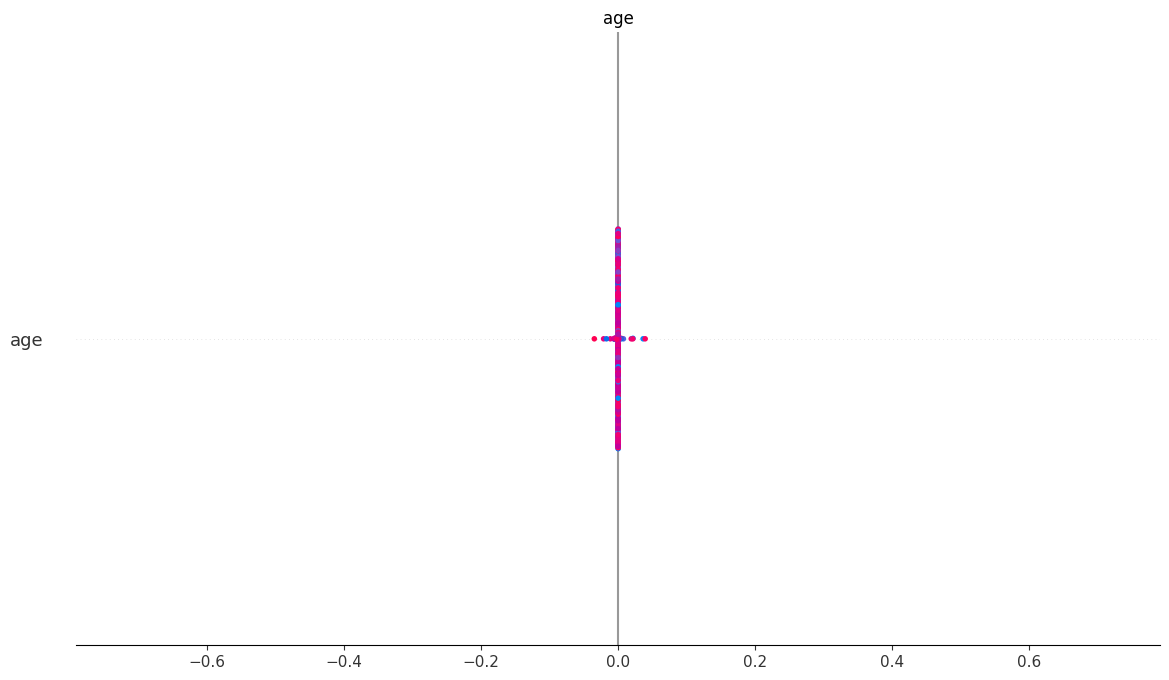

In [ ]:
# Plot feature importance summary
shap.summary_plot(shap_values, X_val_sample, feature_names=X_val_df.columns)

#### 3.2. Train the Model
- Use Early Stopping to prevent overfitting.
- Train for 50 epochs with a batch size of 64.

In [117]:

# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# fold = 1
# accuracies, aucs, f1_scores = [], [], []

# for train_idx, val_idx in kf.split(X, y):
#     print(f"Training fold {fold}...")
#     X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
#     y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
    
#     # Convert to tensors
#     X_train_tensor = tf.convert_to_tensor(X_train_fold, dtype=tf.float32)
#     y_train_tensor = tf.convert_to_tensor(y_train_fold, dtype=tf.float32)
#     X_val_tensor = tf.convert_to_tensor(X_val_fold, dtype=tf.float32)
#     y_val_tensor = tf.convert_to_tensor(y_val_fold, dtype=tf.float32)
    
#     model = build_nn_model(input_dim=X_train_tensor.shape[1])
    
#     early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
#     lr_reduce = callbacks.ReduceLROnPlateau(monitor='val_loss', patience=20, factor=0.5, verbose=1)
    
#     model.fit(X_train_tensor, y_train_tensor,
#               validation_data=(X_val_tensor, y_val_tensor),
#               epochs=150,
#               batch_size=64,
#               callbacks=[early_stopping, lr_reduce],
#               verbose=0)
    
#     y_val_pred_proba = model.predict(X_val_tensor)
#     y_val_pred = (y_val_pred_proba > 0.33).astype(int)   # use your optimized threshold
    
#     acc = accuracy_score(y_val_fold, y_val_pred)
#     auc_val = roc_auc_score(y_val_fold, y_val_pred_proba)
#     f1 = f1_score(y_val_fold, y_val_pred)
    
#     print(f"Fold {fold} — Accuracy: {acc:.4f}, AUC: {auc_val:.4f}, F1: {f1:.4f}")
#     accuracies.append(acc)
#     aucs.append(auc_val)
#     f1_scores.append(f1)
    
#     fold += 1

# print("\n✅ K-Fold Results:")
# print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
# print(f"Mean AUC: {np.mean(aucs):.4f}")
# print(f"Mean F1 Score: {np.mean(f1_scores):.4f}")


In [110]:

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=150, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=150, factor=0.5, verbose=1)

# Train the model

history = model.fit(X_train_resampled, Y_train_resampled,
          validation_data=(X_val, y_val),
          epochs=500,
          batch_size=64,
          class_weight=class_weight_dict,
          callbacks=[early_stopping, lr_reduce],)


Epoch 1/500
72/72 [==============================] - 1s 3ms/step - loss: 0.5569 - accuracy: 0.7683 - auc: 0.8292 - val_loss: 0.4936 - val_accuracy: 0.7439 - val_auc: 0.8531 - lr: 3.0000e-04
Epoch 2/500
72/72 [==============================] - 0s 3ms/step - loss: 0.5417 - accuracy: 0.7563 - auc: 0.8271 - val_loss: 0.5610 - val_accuracy: 0.6934 - val_auc: 0.8405 - lr: 3.0000e-04
Epoch 3/500
72/72 [==============================] - 0s 3ms/step - loss: 0.5419 - accuracy: 0.7513 - auc: 0.8253 - val_loss: 0.5505 - val_accuracy: 0.7073 - val_auc: 0.8380 - lr: 3.0000e-04
Epoch 4/500
72/72 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7557 - auc: 0.8312 - val_loss: 0.4651 - val_accuracy: 0.7666 - val_auc: 0.8499 - lr: 3.0000e-04
Epoch 5/500
72/72 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.7537 - auc: 0.8310 - val_loss: 0.4658 - val_accuracy: 0.7666 - val_auc: 0.8473 - lr: 3.0000e-04
Epoch 6/500
72/72 [==============================]

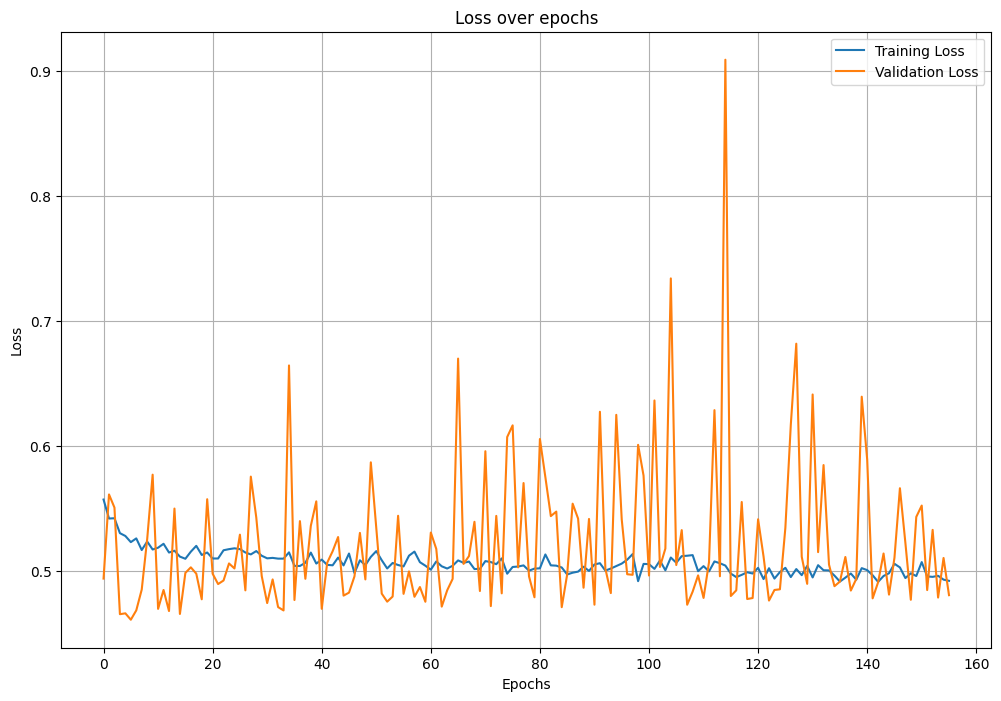

In [111]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.grid()
plt.legend()
plt.show()


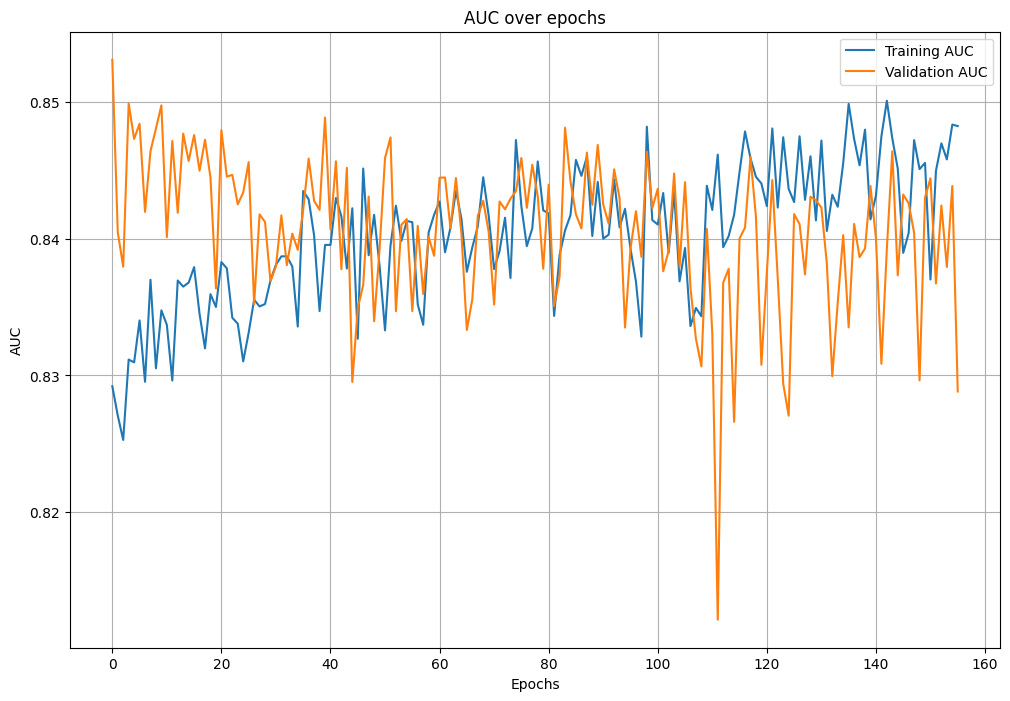

In [112]:

# AUC curve
plt.figure(figsize=(12, 8))
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('AUC over epochs')
plt.grid(True)
plt.legend()

plt.show()

36/36 [==============================] - 0s 629us/step


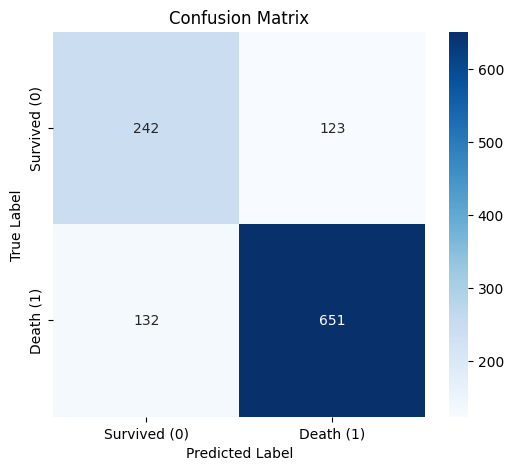

In [113]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Get predictions (threshold = 0.5 for binary classification)
y_pred_proba = model.predict(X_val)
y_pred = (y_pred_proba > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Survived (0)', 'Death (1)'], yticklabels=['Survived (0)', 'Death (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()




In [114]:
from sklearn.metrics import accuracy_score

# Get predictions (threshold = 0.5 for binary classification)
y_pred_proba = model.predict(X_val)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

36/36 [==============================] - 0s 800us/step
Overall Accuracy: 0.78


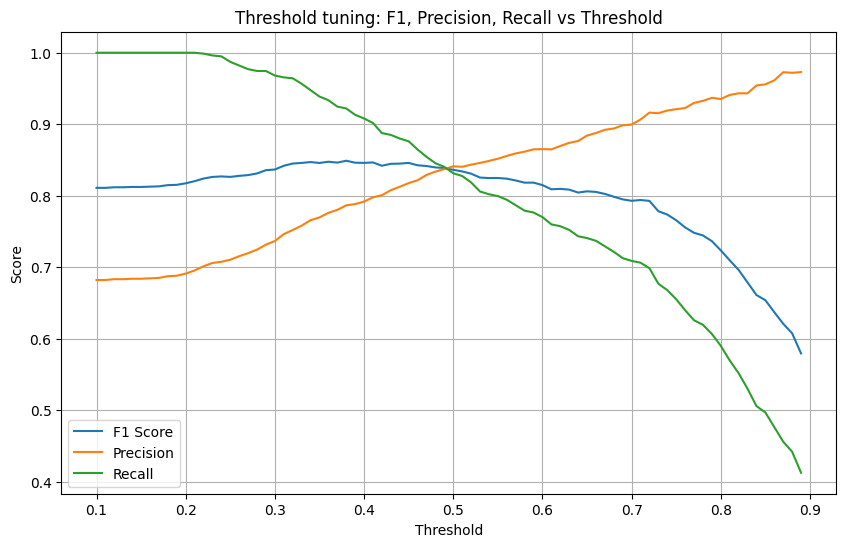

Optimal threshold for highest F1: 0.38


In [115]:
from sklearn.metrics import f1_score, precision_score, recall_score

thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []
precisions = []
recalls = []

for t in thresholds:
    preds = (y_pred_proba > t).astype(int)
    f1_scores.append(f1_score(y_val, preds))
    precisions.append(precision_score(y_val, preds))
    recalls.append(recall_score(y_val, preds))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold tuning: F1, Precision, Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

# Find threshold with best F1
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal threshold for highest F1: {best_threshold:.2f}")
